2017 Edition

The work presented in this notebook has been done jointly by [Simone Rossi](https://srossi93.github.io/) and [Matteo Romiti](https://github.com/MatteoRomiti)

# Goals
The main goals of this project are the following:
1. Revisit the concepts behind Decision Trees and Random Forests
2. Build a simple methodology to address Data Science projects
3. Use the existing implementation of Random Forests in MLLib in a specific use case, that is to predict the delay of flights

# Steps

- First, in section 1, we will go through a short introduction about the fundamentals of Decision Trees and Random Forests, such as feature definition, the form of a decision tree, how does it work and the idea of a forest of decision trees. If the student is familiar with these topics, skip to section 2.
- In section 2, we delve into the details of the use case of this notebook including: providing the context, introducing the data and the basic methodology to address the project in this notebook
- In section 3, we perform data exploration
- In section 4, we build the statistical model and validate it

# 1. Decision trees and Random Forests: Simple but Powerful Algorithms
> Prediction is very difficult, especially if it’s about the future. (Niels Bohr)

Decision trees are a very popular approach to prediction problems. Decision trees can be trained from both categorical and numerical features, to perform classification and regression. They are the oldest and most well-studied types of predictive analytics. In many analytics packages and libraries, most algorithms are devoted either to address classification or regression problems, and they include for example support vector machines (SVM), neural networks, naïve Bayes, logistic regression, and deep learning...

In general, classification refers to the problem of predicting a label, or category, like *spam/not spam*, *rainy/sunny/mild*, for some given data. Regression refers to predicting a numeric quantity like salary, temperature, delay time, product's price. Both classification and regression involve predicting one (or more) values given one (or more) other input values. They require labelled data to perform a training phase, which builds the statistical model: they belong to *supervised learning* techniques.

## 1.1 Feature definition
To understand how regression and classification operate, it is necessary to briefly define the terms that describe their input and output. 

Assume that we want to predict the temperature of tomorrow given today's weather information.
The weather information is a loose concept. For example, we can use many variables to express today's weather such as:
* the average humidity today
* today’s high temperature
* today’s low temperature 
* wind speed
* outlook: e.g. cloudy, rainy, or clear
* ....

These variables are called *features* or *dimensions*. 

Each variable can be quantified. For example, high and low temperatures are measured in degrees Celsius, humidity can be measured as a fraction between 0 and 1, and weather type can be labeled `cloudy`, `rainy` or `clear`...
So, the weather today can be expressed by a list of values: `11.4, 18.0, 0.64, 20, cloudy`. 
Each feature is also called a `predictor`. Together, they constitute a `feature vector`.

A feature whose domain is a set of categories is called **categorical feature**. In our example, `outlook` is a  categorical feature. A feature whose values are numerical is called **numerical feature**. In our example, `temperature` is a numerical feature.

Finally, tomorrow's temperature, that is what we want to predict, is called *target feature*.

## 1.2 Decision Trees & Random Forests
The first question that you might ask is: "Why Decision trees and not another approach?"

Well, the literature shows that the family of algorithms known as decision trees can naturally handle both categorical and numeric features. The training process is easy to understand. The model is easy to interpret. They are robust to outliers in the data, meaning that a few extreme and possibly erroneous data points should not affect the tree at all. The model can be trained in parallel easily. The accuracy is comparable to other methods... In short, there are lots of advantages when using decision trees with respect to other methods! 

The way we use a tree model is very simple to understand. We can say that this process "mimics" the way humans take decisions. For example, to decide whether to play football or not, a natural question would be "does it rain now?". If yes, the decision is `no`. If it's sunny, the condition is favorable to play football. A second natural question could be: "is it windy?". If no, then you may want to stay at home because otherwise it is going to be too hot. Otherwise, a third plausible question could be: "do we have enough people?". If no, then there's no point playing. Otherwise, time to play!

Using a decision tree allows to follow a similar process to that described above (see the image below). Given a new input, the algorithm traverses the tree in a such a way that the input satisfies the condition of each node until reaching a leaf one. The value of the leaf node is the decision.

![A decision tree](https://farm2.staticflickr.com/1690/24308350756_8533286fb5_z.jpg)

The tree model in the figure is built from historical information concerning many past days. The `feature predictor` contains three features: Rain, Is_Windy, Enough_People.
An example of the training data is as follows:

Rain | Is_Windy | Enough_People | Play
-----|----------|---------------|------
Yes | Yes | No | No
No  | No | No | No
No | Yes | Yes | Yes
No | No | Yes | No

As you can see, in the training data, we know the values of predictors and we also know the corresponding answer: we have the ground truth.

One limitation of decision trees is that it's easy to incur in overfitting problems. In other words, the model is too fit to the training data, it is too precise and not general enough. So, when testing the quality of predictions with different testing sets, accuracy could fluctuate. To overcome this limitation, the tree can be pruned after it is built, or even be pruned during the training process. Another approach is building a `Random Decision Forest`.

A `Random Decision Forest`, as its name implies, is a forest of random Decision trees. Each tree element is built randomly from the training data. Randomization generally applies to:
* Building new training data: Random selection of samples from the training data (with replacement) from the original training data
* When building a node: Random selection of a subset of features

To take a decision, the forest "asks" all trees about their prediction, and then chooses the outcome which is the most voted.

# 2. Use case: Flights delay prediction
## 2.1 Context
Every day, in US, there are thousands of flights departures and arrivals: unfortunately, as you may have noticed yourself, flight delays are not a rare event!! Now, given historical data about flights in the country, including the delay information that was computed *a-posteriori* (so the ground truth is available), we want to build a model that can be used to predict how many minutes of delay a flight might experience in the future. This model should provide useful information for the airport to manage better its resources, to minimize the delays and their impact on the journey of its passengers. Alternatively, astute passengers could even use the model to choose the best time for flying, such as to avoid delays.

## 2.2 Data
The data we will use in this notebook has been collected by the RITA (Research and Innovative Technology Administration), and it contains details facets about each air flight that happened in the US between 1987 and 2008. It includes 29 variables such as the origin airport, the destination airport, the scheduled departure time, day, month, the arrival delay... For more information, please visit the following [link](http://stat-computing.org/dataexpo/2009/the-data.html), that provides a lot of detail on the data. Our goal is to build a model to predict `the arrival delay`.

## 2.3 Methodology
For our project, we can follow a simple methodology:

- Understand clearly the context, the data and the goal of the project
- Pre-process the data (data cleaning): the data can contain invalid values or missing values. We have to process our data to deal with them
- Retrieve descriptive information about data: the idea is to discover if whether the data has patterns, whether features have patterns, the skew of values...
- Select appropriate features: Only work with significant features will save us memory, communication cost, and ultimately, training time. Feature selection is also important as it can reduce the impact of noise that characterize the unimportant features.
- Divide the data into training and testing set
- Build a model from the feature in the training set
- Test the model

# 3. Let's play: Data Exploration
Now it's time to apply the simple methodology outlined in section 2.3 on the use case of this notebook.
<div class="alert alert-danger">
**Note:** The source code in this lecture should be executed sequentially in the order.
</div>

## 3.1 Understanding the data schema

The data has 29 features, that can be either categorical or numerical. For example, the `src_airport` (source airport) is categorical: there exist no comparison operator between airport names. We can not say "SGN is bigger than NCE". The departure is numerical, for which a comparison operator exists. For instance, "flight departing before 6PM" can be express by "departure_time < 1800".

In this use case, most features are numerical, except `carier`, `flight_number`, `cancelled`, `cancelation_code` and `diverted`. 

The data contains a header, that is useless in building the statistical model. In addition, we already know the data schema, so we can safely neglect it. Note that there are some features with missing values in some lines of the dataset. The missing values are marked by "NA". These values can cause problems when processing and can lead to unexpected results. Therefore, we need to remove the header and replace all "NA" values by empty values, such as they can be interpreted as null values.

As we have seen already, there are multiple ways to manipulate data:

- Using the RDD abstraction
- Using the DataFrame abstraction. DataFrames can be thought of as distributed tables: each item is a list of values  (the columns). Also, the value in each row of each column can be accessed by the column's name.

Next, we will focus on using DataFrames. However, to use DataFrames, the data must be clean (no invalid values). That means we cannot create DataFrame directly from the "RAW" data. Instead, we will first create an RDD from RAW data, produce a new, clean RDD, then transform it to a DataFrame and work on it. The RDD `cleaned_data` is an RDD[String]. We need to transform it to RDD[(TypeOfColumn1, TypeOfColumn2,.., TypeOfColumn29)] then call a function to create a DataFrame from the new RDD.


## 3.2 Data cleaning
Let's prepare for the cleaning step: Loading the data into an RDD.

First, we need to import some useful python modules for this notebook.

In [1]:
import os
import sys
import re
import calendar
import decimal
import math
from itertools import chain
from time import time
import seaborn as sns

from pprint import pprint
from pyspark import SparkContext
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.types import *
from pyspark.sql import Row
from pyspark.sql.functions import *
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pyspark.sql.functions as func
import matplotlib.patches as mpatches

from pyspark.mllib.tree import DecisionTree, DecisionTreeModel
from pyspark.mllib.util import MLUtils
from pyspark.mllib.regression import LabeledPoint
from pyspark.mllib.tree import RandomForest, RandomForestModel, GradientBoostedTrees, GradientBoostedTreesModel

# to start testing, we can focus on a single year
input_path = "/datasets/airline/1994.csv"
raw_data = sc.textFile(input_path)

### Question 1 
Remove the header and replace the invalid values in our input dataset.

#### Question 1.1

<div class="alert alert-info">

How many records (rows) in the RAW data?

</div>

In [2]:
print(raw_data.count())

5180049


In [3]:
pprint(raw_data.take(5))

['Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay',
 '1994,1,7,5,858,900,954,1003,US,227,NA,56,63,NA,-9,-2,CLT,ORF,290,NA,NA,0,NA,0,NA,NA,NA,NA,NA',
 '1994,1,8,6,859,900,952,1003,US,227,NA,53,63,NA,-11,-1,CLT,ORF,290,NA,NA,0,NA,0,NA,NA,NA,NA,NA',
 '1994,1,10,1,935,900,1023,1003,US,227,NA,48,63,NA,20,35,CLT,ORF,290,NA,NA,0,NA,0,NA,NA,NA,NA,NA',
 '1994,1,11,2,903,900,1131,1003,US,227,NA,148,63,NA,88,3,CLT,ORF,290,NA,NA,0,NA,0,NA,NA,NA,NA,NA']


#### Question 1.2


<div class="alert alert-info">
Except for the first column, the others might contain missing values, which are denoted by `NA`.  

Remove the header and replace NA by an empty character. How many records are left after cleaning the RAW dataset?  

<div class="label label-danger">**NOTE**:</div> be careful with the valid values that can contain string `NA` inside.
</div>

In [2]:
# extract the header
header = raw_data.first()

# replace invalid data with NULL and remove header
cleaned_1994RDD = (raw_data\
                    # filter out the header
                    .filter(lambda line : line != header)
                    # replace the missing values with empty characters
                    .map(lambda line : line.replace('NA', ''))
                    )

In [5]:
print(cleaned_1994RDD.count())

5180048


In [6]:
pprint(cleaned_1994RDD.take(5))

['1994,1,7,5,858,900,954,1003,US,227,,56,63,,-9,-2,CLT,ORF,290,,,0,,0,,,,,',
 '1994,1,8,6,859,900,952,1003,US,227,,53,63,,-11,-1,CLT,ORF,290,,,0,,0,,,,,',
 '1994,1,10,1,935,900,1023,1003,US,227,,48,63,,20,35,CLT,ORF,290,,,0,,0,,,,,',
 '1994,1,11,2,903,900,1131,1003,US,227,,148,63,,88,3,CLT,ORF,290,,,0,,0,,,,,',
 '1994,1,12,3,933,900,1024,1003,US,227,,51,63,,21,33,CLT,ORF,290,,,0,,0,,,,,']


## 3.3 Transforming our data to a DataFrame

Now the data is clean, valid and can be used to create DataFrame. First, we will declare the data schema for the DataFrame. By doing that, we can specify the name and data type of each column.

In [3]:
sqlContext = SQLContext(sc)


# Declare the data schema
# see http://stat-computing.org/dataexpo/2009/the-data.html
# for more information
airline_data_schema = StructType([ \
    #StructField( name, dataType, nullable)
    StructField("year",                     IntegerType(), True), \
    StructField("month",                    IntegerType(), True), \
    StructField("day_of_month",             IntegerType(), True), \
    StructField("day_of_week",              IntegerType(), True), \
    StructField("departure_time",           IntegerType(), True), \
    StructField("scheduled_departure_time", IntegerType(), True), \
    StructField("arrival_time",             IntegerType(), True), \
    StructField("scheduled_arrival_time",   IntegerType(), True), \
    StructField("carrier",                  StringType(),  True), \
    StructField("flight_number",            StringType(),  True), \
    StructField("tail_number",              StringType(), True), \
    StructField("actual_elapsed_time",      IntegerType(), True), \
    StructField("scheduled_elapsed_time",   IntegerType(), True), \
    StructField("air_time",                 IntegerType(), True), \
    StructField("arrival_delay",            IntegerType(), True), \
    StructField("departure_delay",          IntegerType(), True), \
    StructField("src_airport",              StringType(),  True), \
    StructField("dest_airport",             StringType(),  True), \
    StructField("distance",                 IntegerType(), True), \
    StructField("taxi_in_time",             IntegerType(), True), \
    StructField("taxi_out_time",            IntegerType(), True), \
    StructField("cancelled",                StringType(),  True), \
    StructField("cancellation_code",        StringType(),  True), \
    StructField("diverted",                 StringType(),  True), \
    StructField("carrier_delay",            IntegerType(), True), \
    StructField("weather_delay",            IntegerType(), True), \
    StructField("nas_delay",                IntegerType(), True), \
    StructField("security_delay",           IntegerType(), True), \
    StructField("late_aircraft_delay",      IntegerType(), True)\
])

To "convert" an RDD to DataFrame, each element in the RDD must be a list of column values that match the data schema.

In [4]:
# convert each line into a tuple of features (columns)
cleaned_data_to_columns = cleaned_1994RDD.map(lambda l: l.split(","))\
    .map(lambda cols: 
         (
            int(cols[0])  if cols[0] else None,
            int(cols[1])  if cols[1] else None,
            int(cols[2])  if cols[2] else None,
            int(cols[3])  if cols[3] else None,
            int(cols[4])  if cols[4] else None,
            int(cols[5])  if cols[5] else None,
            int(cols[6])  if cols[6] else None,
            int(cols[7])  if cols[7] else None,
            cols[8]       if cols[8] else None,
            cols[9]       if cols[9] else None,
            cols[10]      if cols[10] else None,
            int(cols[11]) if cols[11] else None,
            int(cols[12]) if cols[12] else None,
            int(cols[13]) if cols[13] else None,
            int(cols[14]) if cols[14] else None,
            int(cols[15]) if cols[15] else None,
            cols[16]      if cols[16] else None,
            cols[17]      if cols[17] else None,
            int(cols[18]) if cols[18] else None,
            int(cols[19]) if cols[19] else None,
            int(cols[20]) if cols[20] else None,
            cols[21]      if cols[21] else None,
            cols[22]      if cols[22] else None,
            cols[23]      if cols[23] else None,
            int(cols[24]) if cols[24] else None,
            int(cols[25]) if cols[25] else None,
            int(cols[26]) if cols[26] else None,
            int(cols[27]) if cols[27] else None,
            int(cols[28]) if cols[28] else None
         ))

To train our model, we use the following features: `year`, `month`, `day_of_month`, `day_of_week`, `scheduled_departure_time`, `scheduled_arrival_time`, `arrival_delay`, `distance`, `src_airport`, `dest_airport`.

### Question 2

<div class="alert alert-info">
From RDD `cleaned_data_to_columns` and the schema `airline_data_schema` which are declared before, create a new DataFrame **`df`**.  

Note that, we should only select the necessary features defined above:  

[ `year`, `month`, `day_of_month`, `day_of_week`, `scheduled_departure_time`, `scheduled_arrival_time`, `arrival_delay`, `distance`, `src_airport`, `dest_airport`].  

Finally, the data should be cached.
</div>

In [5]:
df_complete = sqlContext.createDataFrame(cleaned_data_to_columns, airline_data_schema).cache()
df = df_complete.select('year', 'month', 'day_of_month', 'carrier', 'day_of_week', \
                        'scheduled_departure_time', 'scheduled_arrival_time', 'arrival_delay', 'distance', \
                        'src_airport', 'dest_airport', 'arrival_time')\
                .cache()

## 3.4 Descriptive statistics
Next, we will go over a series of simple queries on our data, to explore it and compute statistics. These queries directly map to the questions you need to answer. 

**NOTE:** finding the right question to ask is difficult! Don't be afraid to complement the questions below, with your own questions that, in your opinion, are valuable ways to inspect data. This can give you extra points!

- Basic queries:
  - How many unique origin airports?
  - How many unique destination airports?
  - How many carriers?
  - How many flights that have a scheduled departure time later than 18h00?
  
- Statistic on flight volume: this kind of statistics are helpful to reason about delays. Indeed, it is plausible to assume that "*the more flights in an airport, the higher the probability of delay*".
  - How many flights in each month of the year?
  - Is there any relationship between the number of flights and the days of week?
  - How many flights in different days of months and in different hours of days?
  - Which are the top 20 busiest airports (this depends on inbound and outbound traffic)?
  - Which are the top 20 busiest carriers?
  
- Statistic on the fraction of delayed flights
  - What is the percentage of delayed flights (over total flights) for different hours of the day?
  - Which hours of the day are characterized by the longest flight delay?
  - What are the fluctuation of the percentage of delayed flights over different time granularities?
  - What is the percentage of delayed flights which depart from one of the top 20 busiest airports?
  - What is the percentage of delayed flights which belong to one of the top 20 busiest carriers?

### Question 3: Basic queries

#### Question 3.1 
<div class="alert alert-info">
How many origin airports? How many destination airports?
</div>

In [6]:
num_src_airport = df.select('src_airport').distinct().count()
num_dest_airport = df.select('dest_airport').distinct().count()
print("Number of origin airports.....: ", num_src_airport)
print("Number of destination airports: ", num_dest_airport)

Number of origin airports.....:  224
Number of destination airports:  225


<div class="alert alert-warning">We wonder why we don't have the same number of origin and destination airports. We investigate a bit more. </div>



In [7]:
src_airports_df = df.select('src_airport').distinct()
dest_airports_df = df.select('dest_airport').distinct()

In [12]:
dest_airports_df.subtract(src_airports_df).show()

+------------+
|dest_airport|
+------------+
|         BFI|
|         GUM|
+------------+



<div class="alert alert-warning">
We discover that our dataset contains only inbound flights for the Boeing Field International Airport, Seattle, Washington, and the Guam International Airport, Pacific Ocean.
</div>

In [13]:
src_airports_df.subtract(dest_airports_df).show()

+-----------+
|src_airport|
+-----------+
|        SPN|
+-----------+



<div class="alert alert-warning">
Conversely, the Saipan International Airport appears in our dataset with outbound flights only.
</div>

In [14]:
df.filter(df.dest_airport == 'BFI').withColumnRenamed('scheduled_departure_time', 'sched_dep_time')\
                                   .withColumnRenamed('scheduled_arrival_time', 'sched_arr_time')\
                                   .withColumnRenamed('day_of_month', 'day')\
                                   .drop('day_of_week').show()

+----+-----+---+-------+--------------+--------------+-------------+--------+-----------+------------+------------+
|year|month|day|carrier|sched_dep_time|sched_arr_time|arrival_delay|distance|src_airport|dest_airport|arrival_time|
+----+-----+---+-------+--------------+--------------+-------------+--------+-----------+------------+------------+
|1994|    8| 26|     AS|          1950|            10|         null|    1444|        ANC|         BFI|        null|
+----+-----+---+-------+--------------+--------------+-------------+--------+-----------+------------+------------+



In [15]:
df.filter(df.dest_airport == 'GUM').withColumnRenamed('scheduled_departure_time', 'sched_dep_time')\
                                   .withColumnRenamed('scheduled_arrival_time', 'sched_arr_time')\
                                   .withColumnRenamed('day_of_month', 'day')\
                                   .drop('day_of_week').show()

+----+-----+---+-------+--------------+--------------+-------------+--------+-----------+------------+------------+
|year|month|day|carrier|sched_dep_time|sched_arr_time|arrival_delay|distance|src_airport|dest_airport|arrival_time|
+----+-----+---+-------+--------------+--------------+-------------+--------+-----------+------------+------------+
|1994|   12|  4|     UA|          1405|          1455|           23|     129|        SPN|         GUM|        1518|
|1994|   12|  7|     UA|          1405|          1455|           -3|     129|        SPN|         GUM|        1452|
|1994|   12| 11|     UA|          1405|          1455|          -30|     129|        SPN|         GUM|        1425|
|1994|   12| 14|     UA|          1405|          1455|          -13|     129|        SPN|         GUM|        1442|
|1994|   12| 21|     UA|          1405|          1455|          -28|     129|        SPN|         GUM|        1427|
|1994|   12| 25|     UA|          1405|          1455|          -27|    

In [16]:
df.filter(df.src_airport == 'SPN').withColumnRenamed('scheduled_departure_time', 'sched_dep_time')\
                                  .withColumnRenamed('scheduled_arrival_time', 'sched_arr_time')\
                                  .withColumnRenamed('day_of_month', 'day')\
                                  .drop('day_of_week').show()

+----+-----+---+-------+--------------+--------------+-------------+--------+-----------+------------+------------+
|year|month|day|carrier|sched_dep_time|sched_arr_time|arrival_delay|distance|src_airport|dest_airport|arrival_time|
+----+-----+---+-------+--------------+--------------+-------------+--------+-----------+------------+------------+
|1994|   12|  4|     UA|          1405|          1455|           23|     129|        SPN|         GUM|        1518|
|1994|   12|  7|     UA|          1405|          1455|           -3|     129|        SPN|         GUM|        1452|
|1994|   12| 11|     UA|          1405|          1455|          -30|     129|        SPN|         GUM|        1425|
|1994|   12| 14|     UA|          1405|          1455|          -13|     129|        SPN|         GUM|        1442|
|1994|   12| 21|     UA|          1405|          1455|          -28|     129|        SPN|         GUM|        1427|
|1994|   12| 25|     UA|          1405|          1455|          -27|    

<div class="alert alert-warning">
We just found out that our dataset has two one-way-only route, between Saipan and Guam - with seasonal charters - and between Anchorage, Alaska and Seattle.
</div>

#### Question 3.2
<div class="alert alert-info">
How many carriers?
</div>

In [8]:
num_carriers = df_complete.select('carrier').distinct().count()
print("Number of carriers: ", num_carriers)

Number of carriers:  10


#### Question 3.3

<div class="alert alert-info">
How many night flights (that is, flights departing later than 6pm)?
</div>

In [9]:
total_flights = df_complete.count()
print("Number of total flights: ", total_flights)

Number of total flights:  5180048


In [10]:
num_scheduled_night_flights = df_complete    .select('scheduled_departure_time')\
                                             .filter(df_complete.scheduled_departure_time > 1800)\
                                             .count()
print("Number of scheduled night flights: ", num_scheduled_night_flights)
print("Percentage of night flights: %.2f%%" % (100*num_scheduled_night_flights/total_flights))

Number of scheduled night flights:  1078203
Percentage of night flights: 20.81%


In [11]:
num_actual_night_flights = df_complete.select('scheduled_departure_time', 'departure_delay')\
                            .filter(df_complete.scheduled_departure_time + df_complete.departure_delay > 1800)\
                            .count()
        
print("Number of actual night flights: ", num_actual_night_flights)

Number of actual night flights:  1094267


In [21]:
print(100*(num_actual_night_flights-num_scheduled_night_flights)/num_scheduled_night_flights)

1.489886412855464


<div class="alert alert-warning">We have an increase of ~1.5% of night flights due to departure delays.
</div>

### Question 4: Flight volume statistics

#### Question 4.1: 

<div class="alert alert-info">
How many flights in each month of the year? Plot the changes over months by a line chart and comment the figure.
From the result, we can learn the dynamics of flight volume over months. For example, if we only consider flights in 1994 (to start, it's always better to focus on smaller amount of data), we can discuss about which months are most likely to have flights experiencing delays.
</div>


+-----+------+
|month| count|
+-----+------+
|    8|451086|
|   10|449369|
|   12|446521|
|    7|443736|
|    5|436432|
|    3|435516|
|    9|430861|
|   11|428227|
|    6|426490|
|    1|423861|
|    4|420995|
|    2|386954|
+-----+------+



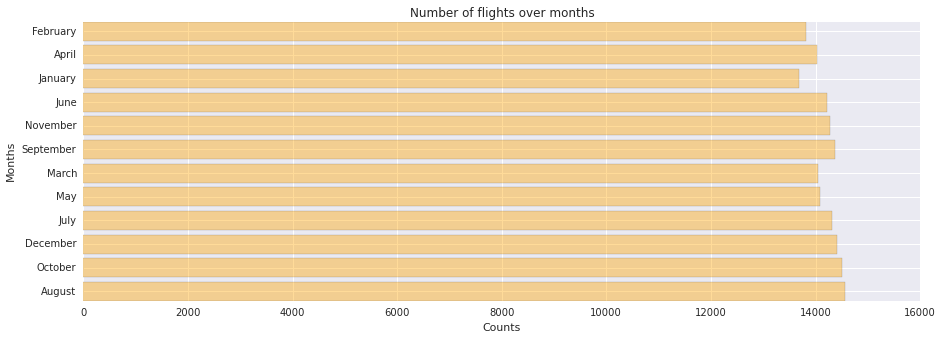

In [12]:
statistic_month = df.groupBy('month').count().orderBy('count', ascending=0)
statistic_month.show()

pdf =  pd.DataFrame(data=statistic_month.collect())
pdf_np = pdf.as_matrix()
for i in range(12):
    pdf_np[i,1] = pdf_np[i,1] / calendar.monthrange(1994,pdf_np[i,0])[1]
# print(pdf_np)

count = pdf_np[:,1]
months = pdf_np[:,0]
# print(months)
y_pos = np.arange(len(months))

plt.figure(figsize=(15,5))
plt.xlabel("Counts")
plt.ylabel("Months")
plt.title('Number of flights over months')
plt.yticks( y_pos, [calendar.month_name[month] for month in months])
plt.barh(y_pos, count, align='center', alpha=0.4, color='orange')
plt.show()


<div class="alert alert-warning">
It's not easy to draw conclusions from these results: we normalized the total number of flights of each month with the number of days it has and it turns out August, October and December seem to be the busiest months. 
</div>

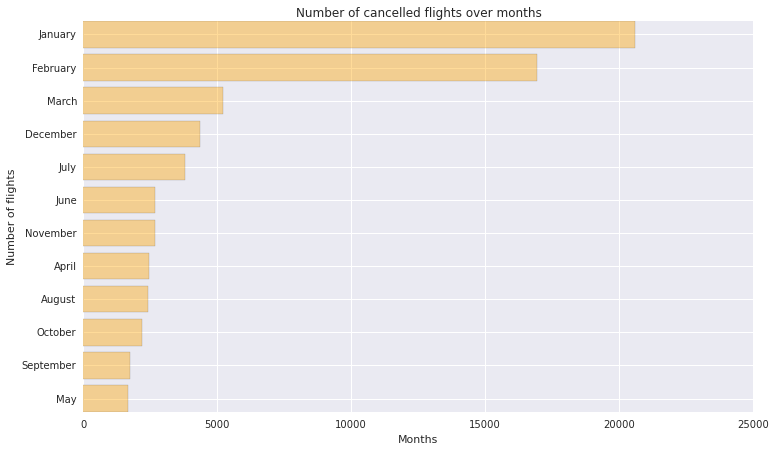

In [13]:
statistic_month_2 = None
tmp = df_complete.filter(df_complete.cancelled != '1')\
                 .groupBy('month').count().orderBy('count', ascending=0)\
                 .withColumnRenamed('count', 'real_count')

statistic_month_2 = tmp.join(statistic_month, statistic_month.month==tmp.month).drop(tmp.month)\
                       .withColumn('diff', statistic_month['count'] - tmp['real_count'])\
                        .drop('real_count', 'count').orderBy('diff', ascending=1)                   

pdf_2 =  pd.DataFrame(data=statistic_month_2.collect())

diff = pdf_2[1].values
months = pdf_2[0].values
y_pos = np.arange(len(months))

plt.figure(figsize=(12,7))
plt.xlabel("Months")
plt.ylabel("Number of flights")
plt.title('Number of cancelled flights over months')
plt.yticks( y_pos, [calendar.month_name[i] for i in months])
plt.barh(y_pos, diff, align='center', alpha=0.4, color='orange')
plt.show()

In [14]:
total_cancelled = statistic_month_2.groupBy().sum('diff').collect()[0][0]
print(total_cancelled)

66740


In [15]:
perc_cancelled = statistic_month_2.withColumn('perc', (statistic_month_2['diff'] / total_cancelled)*100)\
                                  .drop('diff').orderBy('perc', ascending=0)
perc_cancelled.show()

+-----+------------------+
|month|              perc|
+-----+------------------+
|    1| 30.85855558885226|
|    2|25.362601138747376|
|    3| 7.801917890320648|
|   12|6.4998501648186995|
|    7|5.7117171111777045|
|    6| 4.023074617920288|
|   11| 3.987114174408151|
|    4| 3.699430626311058|
|    8|3.6364998501648182|
|   10|3.2843871741084807|
|    9| 2.617620617320947|
|    5|2.5172310458495653|
+-----+------------------+



<div class="alert alert-warning">
An interesting fact happens in January and February when most of the flights are cancelled, most probably due to bad weather conditions. We may also expect that these months will have a high number of delayed flights.
</div>

#### Question 4.2: 
<div class="alert alert-info">
Is there any relationship between the number of flights and the days of the week?  

Plot a bar chart and interpret the figure.  

By answering this question, we could learn about the importance of the weekend/weekday feature for our predictive task.
</div>

+-----------+------+
|day_of_week| count|
+-----------+------+
|          3|756864|
|          2|756532|
|          1|754636|
|          4|751537|
|          5|751531|
|          7|713703|
|          6|695245|
+-----------+------+



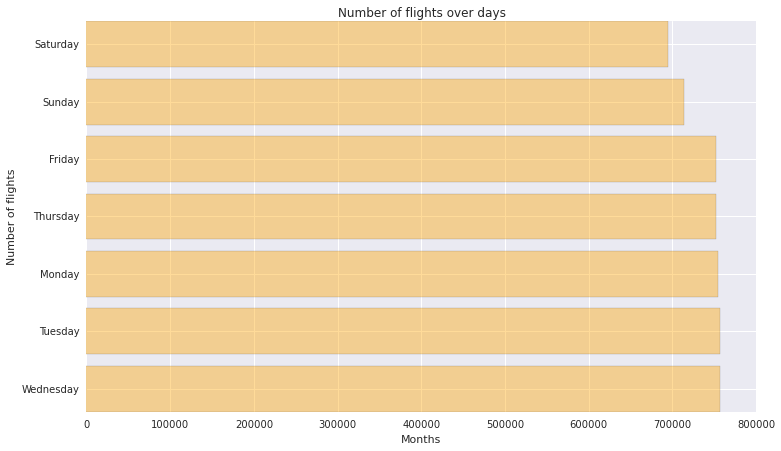

In [16]:
statistic_month = df.groupBy('day_of_week').count().orderBy('count', ascending=0)
statistic_month.show()
pdf =  pd.DataFrame(data=statistic_month.collect())
X = np.sort(pdf[0])

plt.figure(figsize=(12,7))
plt.xlabel("Months")
plt.ylabel("Number of flights")
plt.title('Number of flights over days')
plt.yticks( pdf[0], [calendar.day_name[i] for i in range(0,7)])
plt.barh(X, pdf[1], align='center', alpha=0.4, color='orange')

plt.show()

<div class="alert alert-warning"> 
The busiest day seems to be Wednesday while on Saturday and Sunday there are less flighs. This is suggesting us weekdays could be suffer from delays in terms of frequency and in terms of delay minutes.
</div>

#### Question 4.3
<div class="alert alert-info">
How many flights in different days of months and in different hours of days?  

Plot  bar charts, and interpret your figures.
</div>

+------------+------+
|day_of_month| count|
+------------+------+
|          11|172362|
|          21|172283|
|           7|172210|
|          14|172081|
|          18|171868|
|          28|171760|
|          22|171305|
|          13|171230|
|          27|171222|
|          20|171142|
|          15|170737|
|          23|170695|
|           8|170674|
|           6|170650|
|          10|170252|
|          17|170132|
|           9|170077|
|          16|169985|
|           2|169829|
|           1|169674|
|          12|169542|
|          19|169483|
|           4|169399|
|          26|168767|
|           3|168678|
|           5|168423|
|          25|167435|
|          24|166379|
|          30|155915|
|          29|155695|
|          31|100164|
+------------+------+



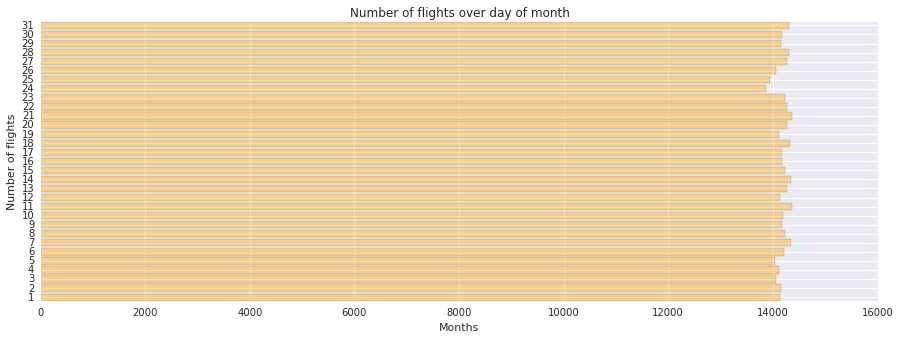

In [17]:
statistic_month = df.groupBy('day_of_month').count().orderBy('count', ascending=0)
statistic_month.show(31)
pdf =  pd.DataFrame(data=statistic_month.collect())
pdf_np = pdf.as_matrix()
for i in range(31):
    if pdf_np[i,0] == 31:
        pdf_np[i,1] = pdf_np[i,1] / 7 # 7 months with 31 days
    if pdf_np[i,0] == 30 or pdf_np[i,0] == 29:
        pdf_np[i,1] = pdf_np[i,1] / 11 # 11 months with 30 or 29 days
    if pdf_np[i,0] < 29:
        pdf_np[i,1] = pdf_np[i,1] / 12

plt.figure(figsize=(15,5))
plt.xlabel("Months")
plt.ylabel("Number of flights")
plt.title('Number of flights over day of month')
plt.yticks( pdf_np[:,0], pdf_np[:,0])
plt.barh(pdf_np[:,0], pdf_np[:,1], align='center', alpha=0.4, color='orange')

plt.show()

<div class="alert alert-warning"> 
To extract correct information form our data, we need again to scale the number of flights per day of month considering how many months have 31 days, how many months have 30 days, and so on, otherwise we would get that day 31 is the one with less flights, since it appears in 7 months only. So, from the graph above we can see that on the 24th and 25th day we have slightly smaller number of flights. Can this be related to Christmas, when people probably celebrate at home instead of travelling? We think this could be the reason.
</div>

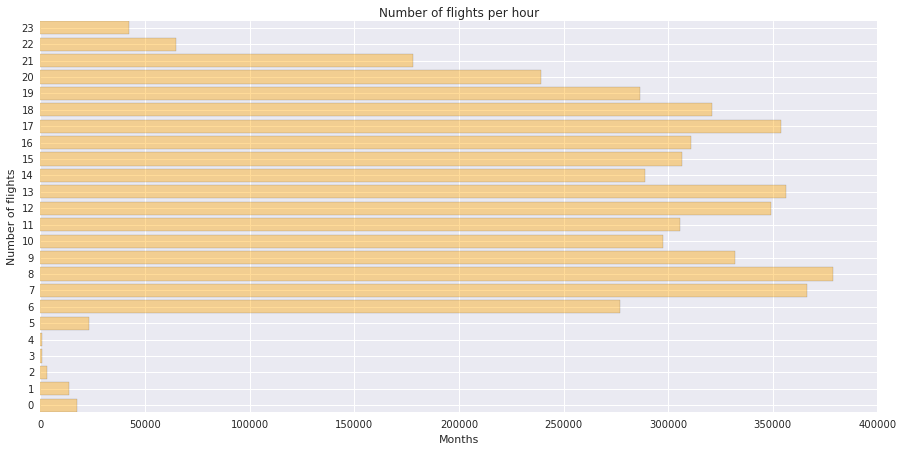

In [18]:
statistic_hours = None
tmp = df_complete.select('departure_time').withColumn('hours', floor((df_complete['departure_time']%2400)/100))\
                 .select('hours')
tmp = tmp.filter(tmp.hours.isNotNull()).groupBy('hours').count().orderBy('hours')
pdf =  pd.DataFrame(data=tmp.collect())

count = pdf[1].values
hours = pdf[0].values
y_pos = np.arange(len(hours))

plt.figure(figsize=(15,7))
plt.xlabel("Months")
plt.ylabel("Number of flights")
plt.title('Number of flights per hour')
plt.yticks( y_pos, hours)
plt.barh(y_pos, count, align='center', alpha=0.4, color='orange')
plt.show()

<div class="alert alert-warning"> 
It's interesting to see that most of the flights in the US take place in the morning, probably when people go to work, during lunch time, and at the end of the working hours, around 5-6pm.  
</div>

#### Question 4.4
<div class="alert alert-info">
Which are the **top 20** busiest airports: compute this in terms of aggregate inbound and outbound number of flights.
</div>

In [19]:
# consider outbound flights
stat_src = (df
            .groupBy(df.src_airport)
            .agg(func.count('*').alias('count1'))
            )
    
# consider inbound flights
stat_dest = (df
            .groupBy(df.dest_airport)
            .agg(func.count('*').alias('count2'))
            )

# full join the statistic of inbound flights and outbound flights
stat_airports = stat_src.join(stat_dest, stat_src.src_airport == stat_dest.dest_airport, how='outer')

# TOP 20 BUSIEST AIRPORTS
stat_airport_traffic = (stat_airports
                            # define the new column `total` 
                            # which has values are equal to the sum of `count1` and `count2`
                            .withColumn('total', stat_airports['count1'] + stat_airports['count2'])
                            .withColumn('airport', coalesce( stat_src.src_airport, stat_dest.dest_airport))
                            # select top airpoint in termns of number of flights
                            .select('airport', 'total').orderBy('total', ascending=0)
                        )

stat_airport_traffic.show(20)

+-------+------+
|airport| total|
+-------+------+
|    ORD|561461|
|    DFW|516523|
|    ATL|443074|
|    LAX|306453|
|    STL|304409|
|    DEN|285526|
|    PHX|280560|
|    DTW|276272|
|    PIT|262939|
|    CLT|259712|
|    MSP|247980|
|    SFO|235478|
|    EWR|233991|
|    IAH|208591|
|    LGA|203362|
|    BOS|199696|
|    LAS|189920|
|    PHL|186897|
|    DCA|176115|
|    MCO|153720|
+-------+------+
only showing top 20 rows



<div class="alert alert-success">
Chicago O'Hare International Airport, Dallas Fort Worth International Airport and Atlanta International Airport are the top three Airports in terms of aggregate number of flights. It may be of interest to see how these airports and the numbers change with the time. We will see this later on!
</div>

#### Question 4.5
<div class="alert alert-info">
Which are the **top 20** busiest carriers: compute this in terms of number of flights? 
</div>


In [20]:
stat_carrier = (df_complete
                .groupBy('carrier')
                .agg(func.count('*').alias('count'))
                .orderBy(desc('count'))
                )

stat_carrier.show(20)

+-------+------+
|carrier| count|
+-------+------+
|     DL|874526|
|     US|857906|
|     AA|722277|
|     UA|638750|
|     WN|565426|
|     CO|484834|
|     NW|482798|
|     TW|258205|
|     HP|177851|
|     AS|117475|
+-------+------+



In [21]:
carrier_perc =  (stat_carrier
                        .withColumn('perc', round(100 * stat_carrier['count'] / total_flights , 2))
                        )
carrier_perc.show()

+-------+------+-----+
|carrier| count| perc|
+-------+------+-----+
|     DL|874526|16.88|
|     US|857906|16.56|
|     AA|722277|13.94|
|     UA|638750|12.33|
|     WN|565426|10.92|
|     CO|484834| 9.36|
|     NW|482798| 9.32|
|     TW|258205| 4.98|
|     HP|177851| 3.43|
|     AS|117475| 2.27|
+-------+------+-----+



<div class="alert alert-warning">
Delta Airways, US Airways, American Airlines controlled almost 50% of the flights in the US. 
The rest of the market was shared by United Airlines, Southwest Airlines, Continental Airways, Northwest Airlines, Trans World Airlines, America West Airlines, Alaska Airlines.
We can compare these results with the ones in 2008, again from the CLOUDS lab: we report below the ranking. 
<br>
<ul>
<li>Southwest Airlines</li>
<li>American Airlines </li>
<li>SkyWest Airlines </li>
<li>Envoy Air </li>
<li>Delta Air Lines</li> 
<li>United Airlines </li>
<li>US Airways </li>
<li>Northwest Airlines </li>
<li>ExpressJet Airlines </li>
<li>Continental Airlines</li>
</ul>
</div>


### Question 5 
Statistics on the percentage of delayed flights

#### Question 5.1
<div class="alert alert-info">
What is the percentage of delayed flights for different hours of the day?  

Plot a bar chart and interpret the figure.  


<div class="label label-success">Remember</div> a flight is considered as delayed if it's actual arrival time is more than 15 minutes late than the scheduled arrival time.
</div>

In [22]:
# create new column that marks whether the flights are delay
df_with_delay = df.withColumn('is_delay', \
                              when((-df.scheduled_arrival_time + df.arrival_time) >= 15, 1).otherwise(0))

# create a new column that indicates the scheduled departure time in hour 
# (ignore the part of minute)
delay_per_hour = df_with_delay.withColumn('hour', round((df_with_delay.scheduled_departure_time)/100, 0)%24)

# # group by hour
statistic_delay_hour = delay_per_hour.groupBy(delay_per_hour.hour)
delay_ratio_per_hour = statistic_delay_hour.agg(
     (func.sum('is_delay')/func.count('*')).alias('delay_ratio')
 )

# order the result by hour
delay_ratio_per_hour = delay_ratio_per_hour.orderBy(delay_ratio_per_hour.hour, ascending=1)
delay_ratio_per_hour.show()

+----+--------------------+
|hour|         delay_ratio|
+----+--------------------+
| 0.0| 0.21857108778625955|
| 1.0|  0.1953130721347492|
| 2.0|  0.1257108650104759|
| 3.0| 0.05060422960725076|
| 4.0|0.020905923344947737|
| 5.0| 0.09004687670336858|
| 6.0| 0.09730253549834167|
| 7.0| 0.13646693337728563|
| 8.0| 0.16137670707541366|
| 9.0| 0.17105296622742444|
|10.0|  0.1655481946240578|
|11.0|  0.1814461876085849|
|12.0| 0.18515059145949272|
|13.0| 0.19707376157901257|
|14.0| 0.20102840269871247|
|15.0| 0.22292034282833376|
|16.0| 0.24391788007596998|
|17.0|  0.2558112502669431|
|18.0| 0.24965832147492534|
|19.0|  0.2573748890741388|
+----+--------------------+
only showing top 20 rows



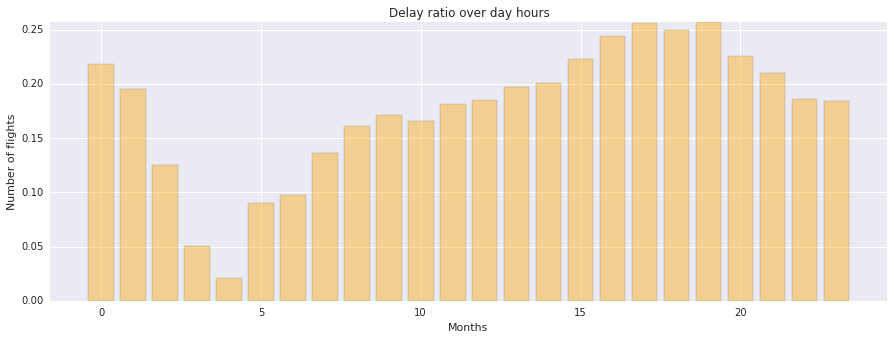

In [23]:
# plot a bar chart
pdf =  pd.DataFrame(data=delay_ratio_per_hour.collect())

count = pdf[1].values
hours = pdf[0].values
y_pos = np.arange(len(hours))

plt.figure(figsize=(15,5))
plt.margins(0.05, 0)
plt.xlabel("Months")
plt.ylabel("Number of flights")
#plt.yticks( y_pos, hours)
plt.bar(y_pos, count, align='center', alpha=0.4, color='orange')

plt.title('Delay ratio over day hours')
plt.show()

<div class="alert alert-warning"> 
Even if the busiest hours in a day, according to the scheduled departure times, are 7am and 8am we don't see a high delay rate, rather we have the highest rates in the evening, when more airplanes may have accumulated some delay from the previous flights. 
</div>

#### Question 5.2
<div class="alert alert-info">
You will realize that saying *"at 4 A.M. there is a very low chance of a flight being delayed"* is not giving you a full picture of the situation. Indeed, it might be true that there is very little probability for an early flight to be delayed, but if it does, the delay might be huge, like 6 hours!  

<ul></ul>

Then, the question is: **which hours of the day are characterized by the largest delay?**  

Plot a Bar chart and explain it.  

</div>

In [25]:
# create a new column that indicates the scheduled departure time in hour 
# (ignore the part of minute)
mean_delay_per_hour = statistic_delay_hour.agg(
    (func.mean('arrival_delay')).alias('mean_delay')
)

mean_delay_per_hour = (
    mean_delay_per_hour
        .orderBy(mean_delay_per_hour.hour, ascending=1)
    )
mean_delay_per_hour.show()   

+----+-------------------+
|hour|         mean_delay|
+----+-------------------+
| 0.0|  4.908624849215923|
| 1.0|  2.490499075785582|
| 2.0| 0.7306650616912429|
| 3.0| -2.981707317073171|
| 4.0|-1.5815602836879432|
| 5.0|0.18995030369961347|
| 6.0|0.37118355093077343|
| 7.0|   1.65522334275665|
| 8.0|  2.746347238480366|
| 9.0|  3.286476893834055|
|10.0|  3.414340124986133|
|11.0|  4.020321999549651|
|12.0|  4.425599754906828|
|13.0|   5.16352674997001|
|14.0|  5.775829448862078|
|15.0|  7.212062362625936|
|16.0|  8.392585126918885|
|17.0|  9.218439766922927|
|18.0|   9.41149137017387|
|19.0|  9.777354006685492|
+----+-------------------+
only showing top 20 rows



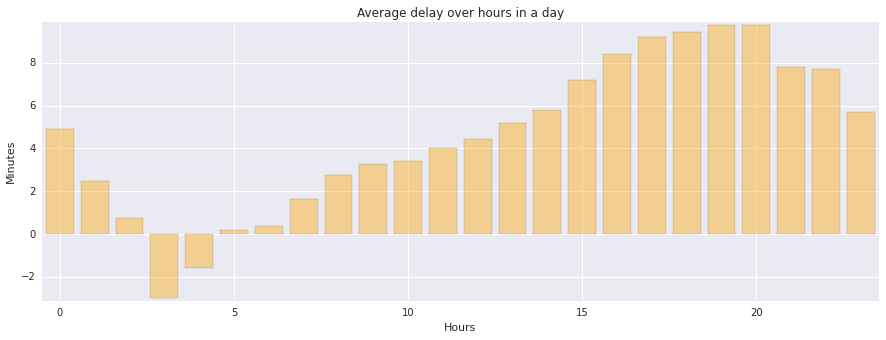

In [27]:
pdf =  pd.DataFrame(data=mean_delay_per_hour.collect())

count = pdf[1].values
hours = pdf[0].values
x_pos = np.arange(len(hours))

plt.figure(figsize=(15,5))
plt.xlabel("Hours")
plt.ylabel("Minutes")
plt.bar(x_pos, count, align='center', alpha=0.4, color='orange')
plt.margins(0.005,0.01)
plt.title('Average delay over hours in a day')
plt.show()

<div class="alert alert-warning"> Towards the end of the day, we see the highest values for the average delay. This can be due to accumulated delays over the day of the specific aircraft. </div>

With data from year 1994, flights from 3AM to 4AM often arrive earlier as scheduled. The flights in the morning have less delay then in the afternoon and evening.

So, an attentive student should notice here that we have somehow a problem with the definition of delay! Next, we will improve how to represent and visualize data to overcome this problem.

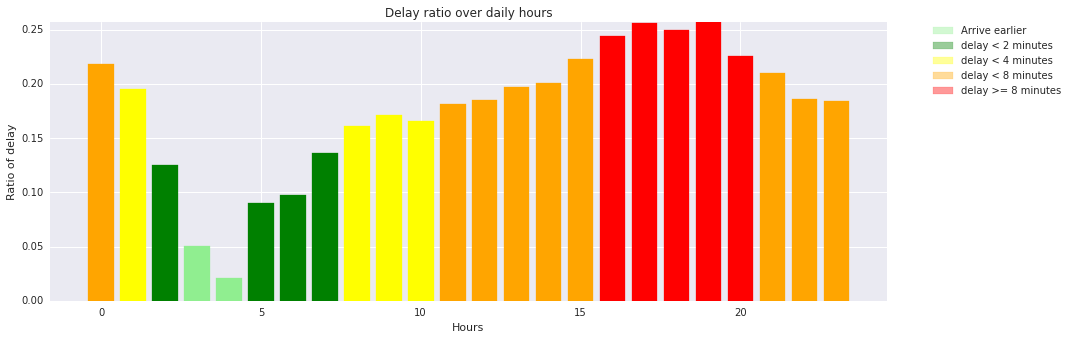

In [28]:
pdf_mean_delay_per_hour = pd.DataFrame(data=mean_delay_per_hour.collect())
pdf_delay_ratio_per_hour =  pd.DataFrame(data=delay_ratio_per_hour.collect())


plt.figure(figsize=(15,5))
plt.margins(0.05, 0)
plt.xlabel("Hours")
plt.ylabel("Ratio of delay")
plt.title('Delay ratio over daily hours')
bars = plt.bar(pdf_delay_ratio_per_hour[0], pdf_delay_ratio_per_hour[1], align='center', edgecolor = "black")
for i in range(0, len(bars)):
    color = 'red'
    if pdf_mean_delay_per_hour[1][i] < 0:
        color = 'lightgreen'
    elif pdf_mean_delay_per_hour[1][i] < 2:
        color = 'green'
    elif pdf_mean_delay_per_hour[1][i] < 4:
        color = 'yellow'
    elif pdf_mean_delay_per_hour[1][i] < 8:
        color = 'orange'

    bars[i].set_color(color)
        
patch1 = mpatches.Patch(color='lightgreen', alpha=0.4, label='Arrive earlier')
patch2 = mpatches.Patch(color='g', alpha=0.4, label='delay < 2 minutes')
patch3 = mpatches.Patch(color='yellow', alpha=0.4, label='delay < 4 minutes')
patch4 = mpatches.Patch(color='orange', alpha=0.4, label='delay < 8 minutes')
patch5 = mpatches.Patch(color='red',alpha=0.4, label='delay >= 8 minutes')

plt.legend(handles=[patch1, patch2, patch3, patch4, patch5], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In the new figure, we have more information in a single plot. The flights in 3AM to 4AM have very low probability of being delayed, and actually depart earlier than their schedule. In contrast, the flights in the 4PM to 8PM range have higher chances of being delayed: in more than 50% of the cases, the delay is 8 minutes or more.

This example shows us that the way representing results are also important.


#### Question 5.3
<div class="alert alert-info">
Plot a bar chart to show the percentage of delayed flights over days in a month
</div>

In [37]:
df_with_delay = df.withColumn('is_delay', when(df_complete.arrival_delay >= 15, 1).otherwise(0))
statistic_day_of_month = (
    df_with_delay
        .groupBy(df_with_delay.day_of_month)
        .agg((sum('is_delay')/func.count('*')).alias('delay_ratio'), \
             func.mean('arrival_delay').alias('mean_delay'))
        # order by day_of_month
        .orderBy(df_with_delay.day_of_month, ascending=1)
    )
statistic_day_of_month.show(31)

+------------+-------------------+------------------+
|day_of_month|        delay_ratio|        mean_delay|
+------------+-------------------+------------------+
|           1|0.14879121138182633| 4.047704074041008|
|           2|0.15071630875763267| 4.227194389614107|
|           3| 0.1485433785081635| 3.590318679798095|
|           4|0.14438692082007568|3.6649673171142756|
|           5| 0.1699233477612915|5.3340552768051595|
|           6|0.16375036624670378| 5.207485277251199|
|           7|0.16580918645839382| 6.392013638139436|
|           8|0.16666861970774693| 6.134743140211592|
|           9|0.18872040311153185|  7.36157083085715|
|          10|0.18175997932476565| 6.060638044126416|
|          11|0.14892493705109014| 4.355033613144351|
|          12| 0.1677401469842281|5.6656073340262045|
|          13| 0.1782981954096829| 6.286658305429677|
|          14|0.16844393047460207| 6.064203168193637|
|          15|0.17487129327562273| 5.524883753865036|
|          16|0.175321351883

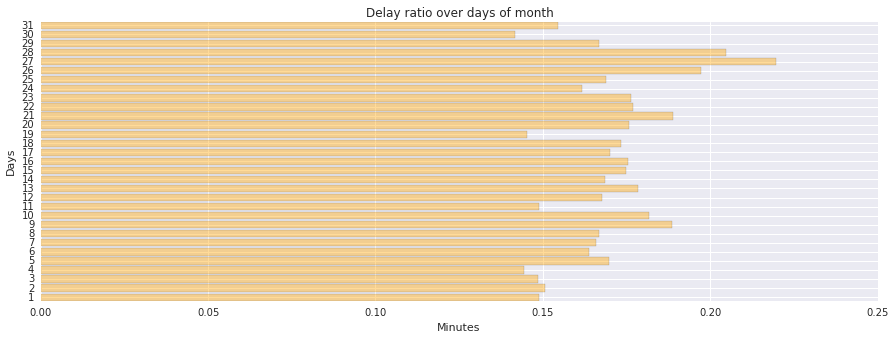

In [38]:
pdf_day_of_month =  pd.DataFrame(data=statistic_day_of_month.collect())

count = pdf_day_of_month[1].values
days = pdf_day_of_month[0].values
y_pos = np.arange(len(days))

plt.figure(figsize=(15,5))
plt.xlabel("Minutes")
plt.ylabel("Days")
plt.yticks( y_pos, days)
plt.barh(y_pos, count, align='center', alpha=0.4, color='orange')

plt.title('Delay ratio over days of month')
plt.show()

<div class="alert alert-warning"> 
At the beginning of the month, we have generally less delays, but we also try to understand a bit more what happened on day 27, since it has the highest value. 
</div>

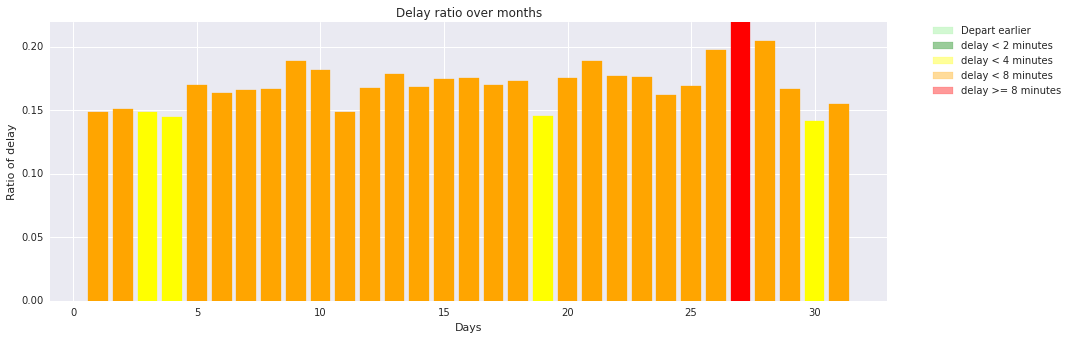

In [39]:
pdf_mean_delay_per_daym = pd.DataFrame(data=statistic_day_of_month.select('day_of_month', 'mean_delay').collect())
pdf_delay_ratio_per_daym =  pd.DataFrame(data=statistic_day_of_month.select('day_of_month', 'delay_ratio').collect())


plt.figure(figsize=(15,5))
plt.margins(0.05, 0)
plt.xlabel("Days")
plt.ylabel("Ratio of delay")
plt.title('Delay ratio over months')
bars = plt.bar(pdf_delay_ratio_per_daym[0], pdf_delay_ratio_per_daym[1], align='center', edgecolor = "black")
for i in range(0, len(bars)):
    color = 'red'
    if pdf_mean_delay_per_daym[1][i] < 0:
        color = 'lightgreen'
    elif pdf_mean_delay_per_daym[1][i] < 2:
        color = 'green'
    elif pdf_mean_delay_per_daym[1][i] < 4:
        color = 'yellow'
    elif pdf_mean_delay_per_daym[1][i] < 8:
        color = 'orange'

    bars[i].set_color(color)
        
patch1 = mpatches.Patch(color='lightgreen', alpha=0.4, label='Depart earlier')
patch2 = mpatches.Patch(color='g', alpha=0.4, label='delay < 2 minutes')
patch3 = mpatches.Patch(color='yellow', alpha=0.4, label='delay < 4 minutes')
patch4 = mpatches.Patch(color='orange', alpha=0.4, label='delay < 8 minutes')
patch5 = mpatches.Patch(color='red',alpha=0.4, label='delay >= 8 minutes')

plt.legend(handles=[patch1, patch2, patch3, patch4, patch5], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In [40]:
specific_delay_month = df.filter(df.day_of_month == 27)\
                         .filter(df.arrival_delay > 15)\
                         .groupBy('month').agg(func.count('*').alias('count'))\
                         .orderBy('count', ascending = 0)
specific_delay_month.show()

+-----+-----+
|month|count|
+-----+-----+
|   11| 5806|
|    1| 5284|
|    4| 3523|
|    3| 3517|
|    6| 3113|
|    7| 3092|
|   12| 2495|
|    9| 2100|
|    2| 2007|
|    5| 1765|
|    8| 1522|
|   10| 1426|
+-----+-----+



<div class="alert alert-warning"> 
We try to focus on November.
</div>

In [41]:
df_complete.filter(df.day_of_month == 27)\
  .filter(df.arrival_delay > 15)\
  .filter(df.month == 11)\
  .select('carrier', 'tail_number', 'arrival_delay', 'src_airport', 'dest_airport', 'carrier_delay', \
          'weather_delay', 'nas_delay', 'late_aircraft_delay')\
  .withColumnRenamed('late_aircraft_delay', 'aircraft_delay').show()

+-------+-----------+-------------+-----------+------------+-------------+-------------+---------+--------------+
|carrier|tail_number|arrival_delay|src_airport|dest_airport|carrier_delay|weather_delay|nas_delay|aircraft_delay|
+-------+-----------+-------------+-----------+------------+-------------+-------------+---------+--------------+
|     US|       null|           45|        PHL|         PIT|         null|         null|     null|          null|
|     US|       null|           39|        CLT|         OAJ|         null|         null|     null|          null|
|     US|       null|           29|        CMH|         PIT|         null|         null|     null|          null|
|     US|       null|           31|        PIT|         SBN|         null|         null|     null|          null|
|     US|       null|           30|        LGA|         PIT|         null|         null|     null|          null|
|     US|       null|           27|        PIT|         IAH|         null|         null|

<div class="alert alert-warning"> 
Unfortunately, we didn't find any useful information about the delay type in our data, but we see that it is related to some airports (PIT - Pittsburgh, CLT - Charlotte) and always with the same carrier.
</div>

In [42]:
df_complete.filter(df.day_of_month == 27)\
  .filter(df.arrival_delay > 15)\
  .filter(df.month == 11)\
  .select('src_airport', 'dest_airport', 'scheduled_departure_time', 'scheduled_arrival_time', 'arrival_delay')\
  .orderBy('scheduled_departure_time', ascending = 0).show()

+-----------+------------+------------------------+----------------------+-------------+
|src_airport|dest_airport|scheduled_departure_time|scheduled_arrival_time|arrival_delay|
+-----------+------------+------------------------+----------------------+-------------+
|        LAS|         SEA|                    2359|                   219|           71|
|        OMA|         LNK|                    2355|                    27|           50|
|        LAS|         CLT|                    2355|                   657|           19|
|        ABQ|         TUS|                    2355|                    45|           48|
|        LAX|         SFO|                    2350|                   100|           40|
|        PDX|         ORD|                    2335|                   516|          104|
|        LAS|         PIT|                    2335|                   646|           24|
|        LAS|         DFW|                    2332|                   358|          150|
|        PHX|        

<div class="alert alert-warning">
From here, we can see that some delays depend on the departure airports: ATL and LAS seem to have experienced some problems.
</div>


#### Question 5.4
<div class="alert alert-info">
Plot a bar chart to show the percentage of delayed flights over days in a week
</div>

In [43]:
df_with_delay = df.withColumn('is_delay', when(df_complete.arrival_delay >= 15, 1).otherwise(0))
statistic_day_of_week = (
    df_with_delay
        .groupBy(df_with_delay.day_of_week)
        .agg((sum('is_delay')/func.count('*')).alias('count_delay'),\
             func.mean('arrival_delay').alias('mean_delay'))
        # order by day_of_month
        .orderBy(df_with_delay.day_of_week, ascending=1)
    )
statistic_day_of_week.show(7)

+-----------+-------------------+------------------+
|day_of_week|        count_delay|        mean_delay|
+-----------+-------------------+------------------+
|          1|0.16329197122851283| 5.263077576154884|
|          2|0.15330349542385516| 4.738548604915077|
|          3| 0.1815121342803991| 6.977115566590911|
|          4|0.19779731403776526| 7.648937926405837|
|          5|0.19487020495495197| 7.354033802099836|
|          6|0.14140914353932788|3.1383468665175154|
|          7|0.15609574290706357| 4.286022611063714|
+-----------+-------------------+------------------+



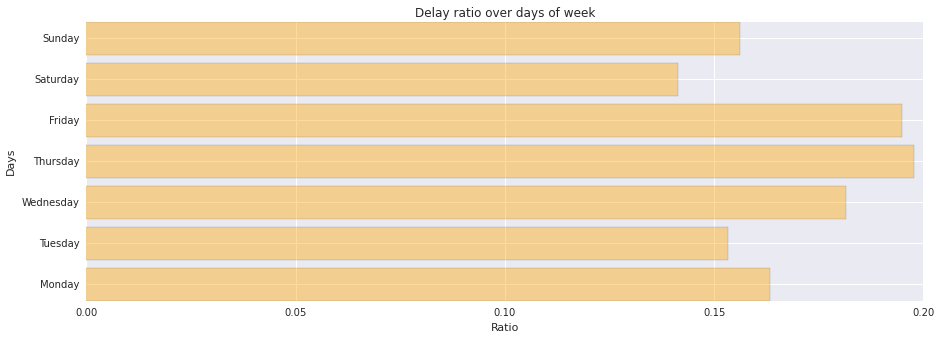

In [44]:
pdf_day_of_week =  pd.DataFrame(data=statistic_day_of_week.collect())

count = pdf_day_of_week[1].values
days = pdf_day_of_week[0].values
y_pos = np.arange(len(days))

plt.figure(figsize=(15,5))
plt.xlabel("Ratio")
plt.ylabel("Days")
plt.yticks( y_pos, [calendar.day_name[i-1] for i in days])
plt.barh(y_pos, count, align='center', alpha=0.4, color='orange')

plt.title('Delay ratio over days of week')
plt.show()

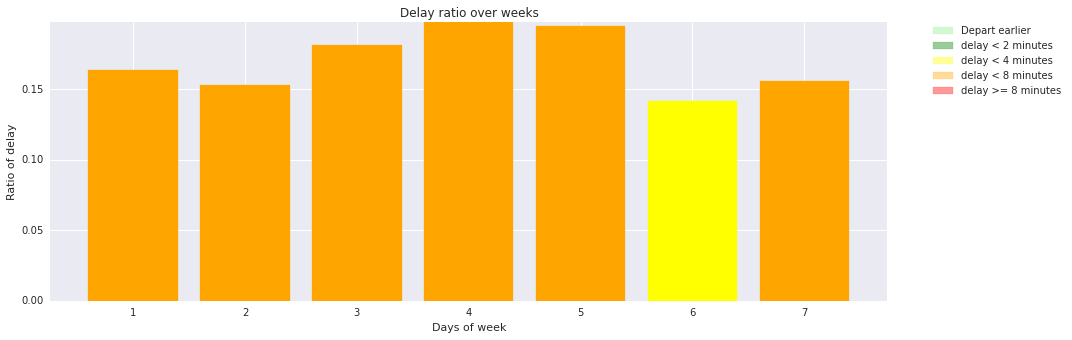

In [45]:
pdf_mean_delay_per_dayw = pd.DataFrame(data=statistic_day_of_week.select('day_of_week', 'mean_delay').collect())
pdf_delay_ratio_per_dayw = pd.DataFrame(data=statistic_day_of_week.select('day_of_week', 'count_delay').collect())


plt.figure(figsize=(15,5))
plt.margins(0.05, 0)
plt.xlabel("Days of week")
plt.ylabel("Ratio of delay")
plt.title('Delay ratio over weeks')
bars = plt.bar(pdf_delay_ratio_per_dayw[0], pdf_delay_ratio_per_dayw[1], align='center', edgecolor = "black")
for i in range(0, len(bars)):
    color = 'red'
    if pdf_mean_delay_per_dayw[1][i] < 0:
        color = 'lightgreen'
    elif pdf_mean_delay_per_dayw[1][i] < 2:
        color = 'green'
    elif pdf_mean_delay_per_dayw[1][i] < 4:
        color = 'yellow'
    elif pdf_mean_delay_per_dayw[1][i] < 8:
        color = 'orange'

    bars[i].set_color(color)
        
patch1 = mpatches.Patch(color='lightgreen', alpha=0.4, label='Depart earlier')
patch2 = mpatches.Patch(color='g', alpha=0.4, label='delay < 2 minutes')
patch3 = mpatches.Patch(color='yellow', alpha=0.4, label='delay < 4 minutes')
patch4 = mpatches.Patch(color='orange', alpha=0.4, label='delay < 8 minutes')
patch5 = mpatches.Patch(color='red',alpha=0.4, label='delay >= 8 minutes')

plt.legend(handles=[patch1, patch2, patch3, patch4, patch5], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

<div class="alert alert-warning"> 
Days in the middle of the week experience the highest delay frequency. This is a bad news for airlines with customers travelling for work during the week!
</div>

#### Question 5.5
<div class="alert alert-info">
Plot a bar chart to show the percentage of delayed flights over months in a year
</div>

In [46]:
df_with_delay = df_complete.withColumn('is_delay', when(df_complete.arrival_delay >= 15, 1).otherwise(0))
statistic_month = (
    df_with_delay
        .groupBy(df_with_delay.month)
        .agg((sum('is_delay')/func.count('*')).alias('count_delay'), func.mean('arrival_delay').alias('mean_delay'))
        # order by day_of_month
        .orderBy(df_with_delay.month, ascending=1)
    )
statistic_month.show(12)

+-----+-------------------+------------------+
|month|        count_delay|        mean_delay|
+-----+-------------------+------------------+
|    1|0.24275411042771097|10.700433047042505|
|    2|0.21423476692320018|  9.21163894842508|
|    3|0.16042808989796012| 4.509724110951733|
|    4|0.16188790840746328|5.3110195501970345|
|    5|0.11835291637643436|2.3457444235327722|
|    6|0.17327956106825482| 6.609869842253827|
|    7|0.19398696522256476| 7.877674453596449|
|    8|0.15460023144145463| 5.211512636774567|
|    9|0.11516243057505784|2.0335722685781485|
|   10|0.13426382327218833|3.4944407362776677|
|   11|0.18429477823677629| 5.577380756172331|
|   12| 0.1956167795019719| 5.978600390278839|
+-----+-------------------+------------------+



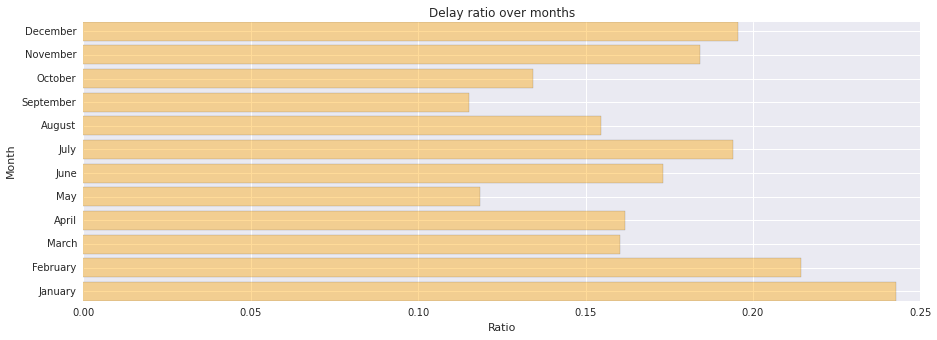

In [47]:
pdf_month =  pd.DataFrame(data=statistic_month.collect())

count = pdf_month[1].values
months = pdf_month[0].values
y_pos = np.arange(len(months))

plt.figure(figsize=(15,5))
plt.xlabel("Ratio")
plt.ylabel("Month")
plt.yticks( y_pos, [calendar.month_name[i] for i in months])
plt.barh(y_pos, count, align='center', alpha=0.4, color='orange')

plt.title('Delay ratio over months')
plt.show()

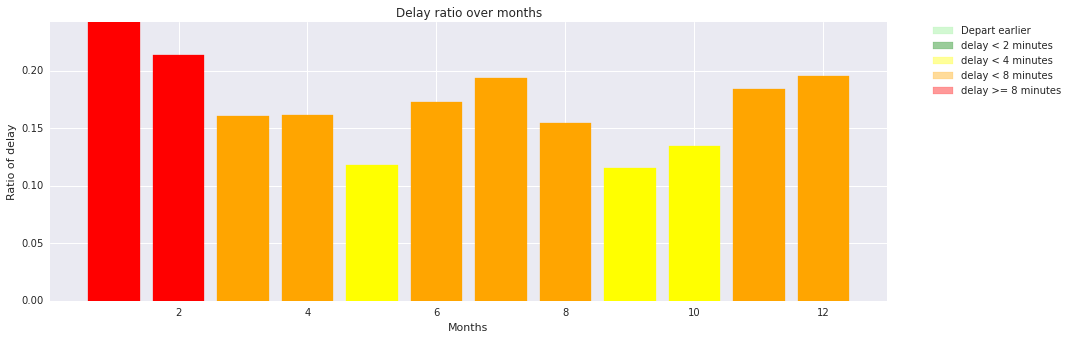

In [48]:
pdf_mean_delay_per_m = pd.DataFrame(data=statistic_month.select('month', 'mean_delay').collect())
pdf_delay_ratio_per_m =  pd.DataFrame(data=statistic_month.select('month', 'count_delay').collect())


plt.figure(figsize=(15,5))
plt.margins(0.05, 0)
plt.xlabel("Months")
plt.ylabel("Ratio of delay")
plt.title('Delay ratio over months')

bars = plt.bar(pdf_delay_ratio_per_m[0], pdf_delay_ratio_per_m[1], align='center', edgecolor = "black")
for i in range(0, len(bars)):
    color = 'red'
    if pdf_mean_delay_per_m[1][i] < 0:
        color = 'lightgreen'
    elif pdf_mean_delay_per_m[1][i] < 2:
        color = 'green'
    elif pdf_mean_delay_per_m[1][i] < 4:
        color = 'yellow'
    elif pdf_mean_delay_per_m[1][i] < 8:
        color = 'orange'

    bars[i].set_color(color)
        
patch1 = mpatches.Patch(color='lightgreen', alpha=0.4, label='Depart earlier')
patch2 = mpatches.Patch(color='g', alpha=0.4, label='delay < 2 minutes')
patch3 = mpatches.Patch(color='yellow', alpha=0.4, label='delay < 4 minutes')
patch4 = mpatches.Patch(color='orange', alpha=0.4, label='delay < 8 minutes')
patch5 = mpatches.Patch(color='red',alpha=0.4, label='delay >= 8 minutes')

plt.legend(handles=[patch1, patch2, patch3, patch4, patch5], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

<div class="alert alert-warning"> 
Recalling the fact that August, October and December are the busiest months, we don't see that much of correlation with this latest result. We see instead an increment of delay ratio during winter (January and February) when weather conditions may be unfavourable. We can instead classify May and September as "quiet months".
</div>

We are ready now to draw some observations from our data, even if we have only looked at data coming from a year worth of flights:

- The probability for a flight to be delayed is low at the beginning or at the very end of a given months
- Flights on two first weekdays and on the weekend, are less likely to be delayed
- May and September are very good months for travelling, as the probability of delay is low (remember we're working on US data. Do you think this is also true in France?)


<div class="alert alert-warning"> 
We think we should get similar results for flights in France because both the nations share similar liestyles, holiday seasons. In France though, weather conditions may be different and this could influence positively the flights.
</div>

Putting things together, we can have a global picture of the whole year!

In [49]:
df_with_delay = df_complete.withColumn('is_delay', when(df["arrival_delay"] >= 15, 1).otherwise(0))
statistic_day = df_with_delay.groupBy(['year','month', 'day_of_month', 'day_of_week'])\
    .agg((func.sum('is_delay')/func.count('*')).alias('delay_ratio'))

# assume we do statistic on year 1994
statistic_day = statistic_day.orderBy('year', 'month', 'day_of_month', 'day_of_week')
pdf = pd.DataFrame(data=statistic_day.collect())

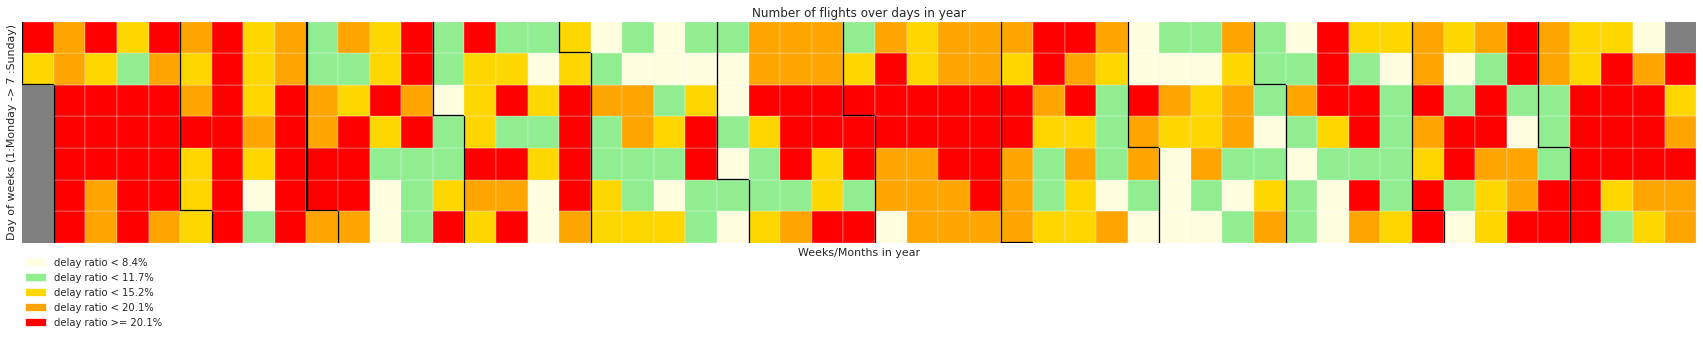

In [50]:
fig = plt.figure(figsize=(30,20))                                                             
ax = fig.add_subplot(1,1,1)     
plt.xlabel("Weeks/Months in year")
plt.ylabel("Day of weeks (1:Monday -> 7 :Sunday)")
plt.title('Number of flights over days in year')
  
rec_size = 0.3
from matplotlib.patches import Rectangle
import datetime
num_days = len(pdf[0])
ax.patch.set_facecolor('gray')
ax.set_aspect('equal', 'box')
ax.xaxis.set_major_locator(plt.NullLocator())
ax.yaxis.set_major_locator(plt.NullLocator())

for i in range(0, num_days):
    # extract information from the result
    year = pdf[0][i]
    month = pdf[1][i]
    day_of_month = pdf[2][i]
    day_of_week = pdf[3][i]
    day_of_year= datetime.date(year=year, month=month, day=day_of_month).timetuple()
    week_of_year = datetime.date(year=year, month=month, day=day_of_month).isocalendar()[1]
    
    # dealing with the week of the previous year
    if week_of_year == 52 and month == 1:
        week_of_year = 0
        
    # the coordinates of a day in graph
    X = week_of_year*rec_size
    Y = day_of_week*rec_size
    
    # use different colors to show the delay ratio
    color = 'white'
    if pdf[4][i] <= 0.084:
        color = 'lightyellow'
    elif pdf[4][i] <= 0.117:
        color = 'lightgreen'
    elif pdf[4][i] <= 0.152:
        color = 'gold'
    elif pdf[4][i] <= 0.201:
        color = 'orange'
    else:
        color = 'red'
    rect = plt.Rectangle((X - rec_size/2.0, Y - rec_size/2.0), rec_size, rec_size,
                      alpha=1, facecolor=color, edgecolor='whitesmoke')

    ax.add_patch(rect)
    
    # drawing boders to separate months
    if day_of_month <= 7:
        rect2 = plt.Rectangle((X -rec_size/2.0, Y - rec_size/2.0), 0.01, rec_size,
                      alpha=1, facecolor='black')
        ax.add_patch(rect2)
    if day_of_month == 1:
        rect2 = plt.Rectangle((X - rec_size/2.0, Y - rec_size/2.0), rec_size, 0.01,
                      alpha=1, facecolor='black')
        ax.add_patch(rect2)
ax.autoscale_view()

patch1 = mpatches.Patch(color='lightyellow', label='delay ratio < 8.4%')
patch2 = mpatches.Patch(color='lightgreen', label='delay ratio < 11.7%')
patch3 = mpatches.Patch(color='gold', label='delay ratio < 15.2%')
patch4 = mpatches.Patch(color='orange', label='delay ratio < 20.1%')
patch5 = mpatches.Patch(color='red', label='delay ratio >= 20.1%')

plt.legend(handles=[patch1, patch2, patch3, patch4, patch5], bbox_to_anchor=(0, -.05), loc=2, borderaxespad=0.)

plt.show()

#### Question 5.6
<div class="alert alert-info">
Explain figure 10.
</div>

<div class="alert alert-warning"> 
We can see the delay's behaviour (in terms of percentage) in 1994. As previously reported, May and September do not show many red squares. We usually have red spots in the middle of the week and rarely on weekends, in particular in June, July, December and January. The summer delays may be due to the fact that many people travels for holidays, while in winter the reason is more likely the weather.
</div>

#### Question 5.7
<div class="alert alert-info">

What is the delay probability for the top 20 busiest airports?  


By drawing the flight volume of each airport and the associated delay probability in a single plot, we can observe the relationship between airports, number of flights and the delay.  

<div class="label label-success">HINT </div>  Function `<df_colum>.isin(<list>)` helps checking whether a value in column belongs to a list.
</div>

In [50]:
####### The delay ratio of the top 20 busiest airports ########
K = 20

# extract top_20_airports from stat_airport_traffic
top_20_airports = [item[0] for item in stat_airport_traffic.take(K)]

# select the statistic of source airports
statistic_ratio_delay_airport = (
    df_with_delay
        # select only flights that depart from one of top 20 ariports
        .filter(df_with_delay.src_airport.isin(top_20_airports))
        # group by source airport
        .groupBy(df_with_delay.src_airport)
        #  calculate the delay ratio
        .agg((sum('is_delay')/func.count('*')).alias('delay_ratio'))
        # sort by name of airport
        .orderBy('src_airport')
    )

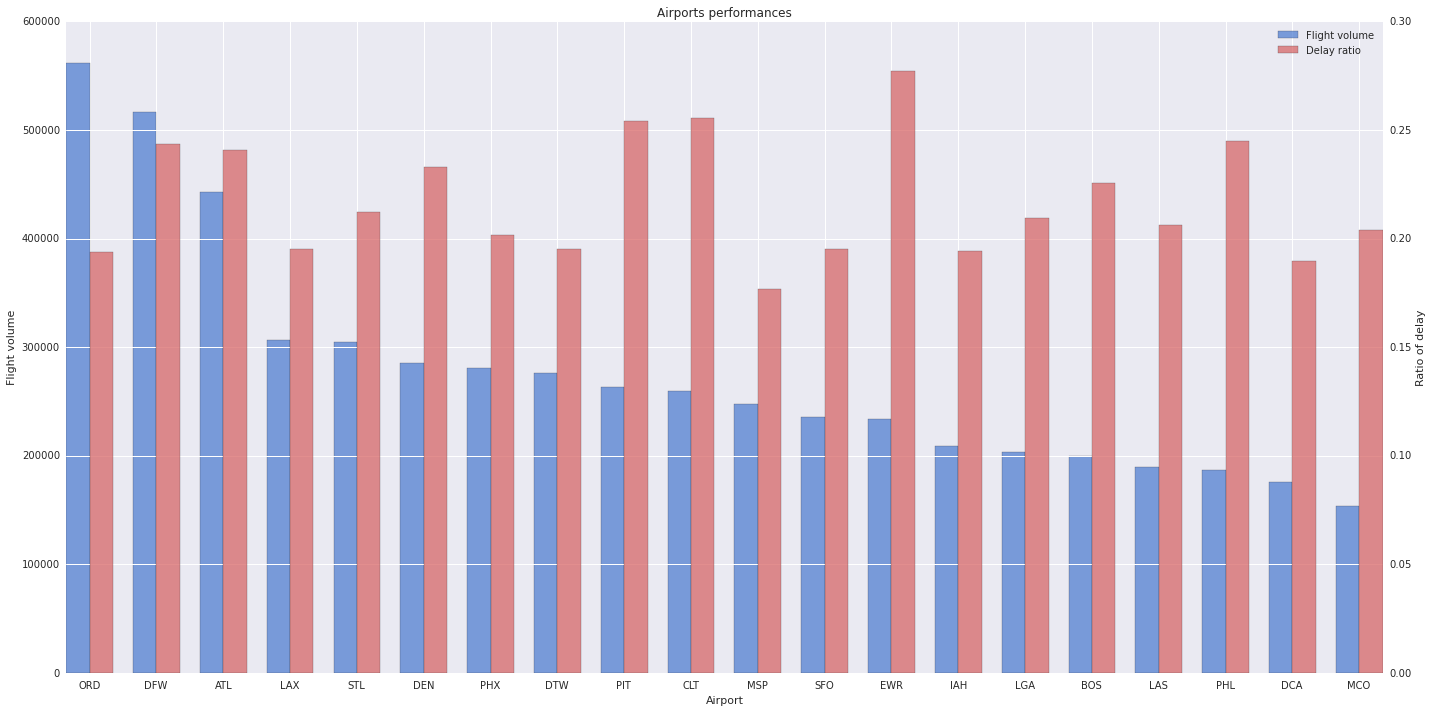

In [49]:
# collect data and plot
tmp = statistic_ratio_delay_airport.join(stat_airport_traffic, \
                                    statistic_ratio_delay_airport.src_airport == stat_airport_traffic.airport, \
                                    how='inner')\
                                    .drop('src_airport')\
                                    .select('airport', 'delay_ratio', 'total').orderBy(desc('total'))

pdf_ratio_delay_airport = pd.DataFrame(data=tmp.select('airport', 'delay_ratio').collect())
pdf_top_20_airport_volume = pd.DataFrame(data=tmp.select('airport', 'total').take(20), \
                                         columns=['src_airport', 'total'])

index = np.arange(len(top_20_airports))
bar_width = 0.35
opacity = 0.4

fig = plt.figure(figsize=(20,10))                                                             
ax = fig.add_subplot(1,1,1)

ax2 = ax.twinx()
plt.axis('normal')
ax.set_xlabel("Airport")
ax.set_ylabel("Flight volume")
ax2.set_ylabel("Ratio of delay")
plt.xticks(index + bar_width, top_20_airports)
plt.title('Airports performances')
plt.grid(True,which="both",ls="-")
bar = ax.bar(index, pdf_top_20_airport_volume['total'], 
        bar_width, color='b', alpha=0.7, 
        label='Flight volume')
bar2 = ax2.bar(index + 1.5*bar_width, pdf_ratio_delay_airport[1], bar_width, 
       align='center', color='r', alpha=0.7, 
       label='Delay ratio')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

plt.tight_layout()
plt.show()

<div class="alert alert-warning"> 
The 20 busiest airports have a delay ratio between ~17% and 27%, but the worst-performing airports in terms of delay ratio, i.e. Newark, Charlotte and Pittsburgh, are not the among the busiests. From this point of view, they are the worst airports. 
</div>

#### Question 5.8
<div class="alert alert-info">
What is the percentage of delayed flights which belongs to one of the top K busiest carriers?  
Comment the figure!
</div>

In [53]:
K = 10

# extract top_k_carriers from stat_carrier
top_k_carriers = [item[0] for item in stat_carrier.take(K)]

statistic_ratio_delay_carrier = (
    df_with_delay
        # select only flights that belong to one of the top K carriers
        .filter(df_with_delay.carrier.isin(top_k_carriers))
        # group by carrier
        .groupBy(df_with_delay.carrier)
        #  calculate the delay ratio
        .agg((sum('is_delay')/func.count('*')).alias('delay_ratio'))
        # sort by name of airport
         .orderBy('carrier')
    )
statistic_ratio_delay_carrier.show(20)

+-------+-------------------+
|carrier|        delay_ratio|
+-------+-------------------+
|     AA| 0.1752444006939166|
|     AS| 0.1596424771227921|
|     CO| 0.1955576547849367|
|     DL|0.18328443065157582|
|     HP|0.18625141269939444|
|     NW| 0.1294806523639286|
|     TW|0.18212273193780135|
|     UA| 0.1686528375733855|
|     US|0.18422298014001534|
|     WN|0.12829795587751536|
+-------+-------------------+



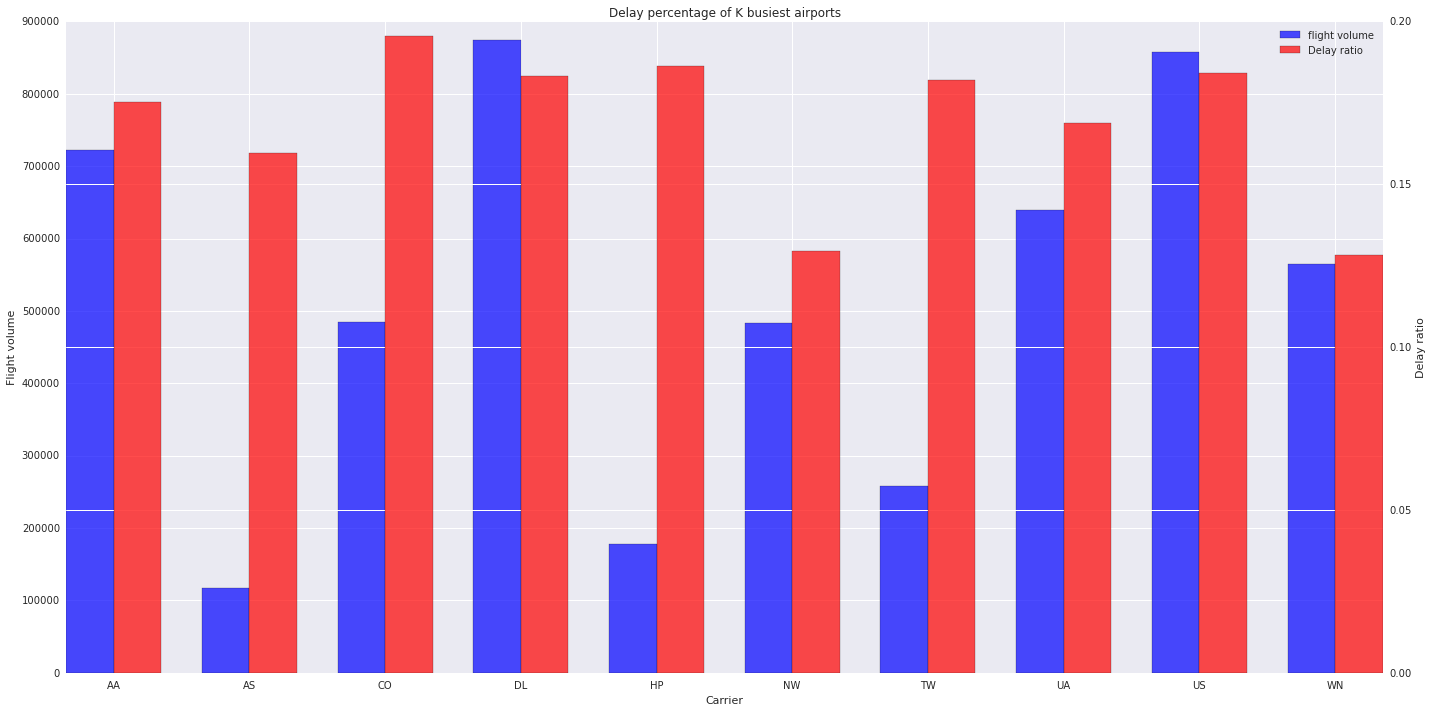

In [54]:
# collect data and plot
pdf_ratio_delay_carrier = pd.DataFrame(data=statistic_ratio_delay_carrier.collect())
pdf_top_k_carrier_volume = pd.DataFrame(data=stat_carrier.take(K), columns=['carrier', 'count'])
pdf_top_k_carrier_volume = pdf_top_k_carrier_volume.sort_values(by='carrier')
top_k_carriers.sort()
index = np.arange(len(top_k_carriers))
bar_width = 0.35
opacity = 0.4

fig = plt.figure(figsize=(20,10))                                                             
ax = fig.add_subplot(1,1,1)

ax2 = ax.twinx()
plt.axis('normal')
ax.set_xlabel("Carrier")
ax.set_ylabel("Flight volume")
ax2.set_ylabel("Delay ratio")
plt.xticks(index + bar_width, top_k_carriers)

plt.title('Delay percentage of K busiest airports')
plt.grid(True,which="both",ls="-")
bar = ax.bar(index, pdf_top_k_carrier_volume['count'], 
        bar_width, color='b', alpha=0.7, 
        label='flight volume')
bar2 = ax2.bar(index + 1.5*bar_width, pdf_ratio_delay_carrier[1], bar_width, 
       align='center', color='r', alpha=0.7, 
       label='Delay ratio')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

plt.tight_layout()
plt.show()

<div class="alert alert-warning"> 
According to this graph, the worst carriers in terms of delay ratio are Delta Air Lines (DL), US Airways (US) which have a high flights volume, but also Continental Airlines (CO), America West Airlines (HP), Alaska Airlines (AS) and Trans World Airlines (TW) which have a lower flights volume and so we could think they perform worse than the others. 
</div>

<div class="alert alert-success">
<h1> Planes details </h1>
<br>
Now, we want to retrieve more information on this problem. To do so, we firstly look at details on planes, such as manufacturer, model, aircraft type and engine type.
</div>

In [55]:
input_path2 = "additional_data/plane-data.csv"
raw_plane_data = sc.textFile(input_path2)
# tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year

In [56]:
header = raw_plane_data.first()
# replace invalid data with NULL and remove header
clean_plane_data = (raw_plane_data\
                    # filter out the header
                    .filter(lambda line : line != header)
                    )
clean_plane_data.take(40)

['N050AA',
 'N051AA',
 'N052AA',
 'N054AA',
 'N055AA',
 'N056AA',
 'N057AA',
 'N058AA',
 'N059AA',
 'N060AA',
 'N061AA',
 'N062AA',
 'N063AA',
 'N064AA',
 'N065AA',
 'N066AA',
 'N067AA',
 'N068AA',
 'N069AA',
 'N070AA',
 'N071AA',
 'N072AA',
 'N073AA',
 'N074AA',
 'N075AA',
 'N076AA',
 'N077AA',
 'N078AA',
 'N079AA',
 'N080AA',
 'N081AA',
 'N082AA',
 'N083AA',
 'N084AA',
 'N10156,Corporation,EMBRAER,02/13/2004,EMB-145XR,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2004',
 'N102UW,Corporation,AIRBUS INDUSTRIE,05/26/1999,A320-214,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998',
 'N10323,Corporation,BOEING,07/01/1997,737-3TO,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1986',
 'N103US,Corporation,AIRBUS INDUSTRIE,06/18/1999,A320-214,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1999',
 'N104UA,Corporation,BOEING,01/26/1998,747-422,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998',
 'N104UW,Corporation,AIRBUS INDUSTRIE,07/02/1999,A320-214,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1999']

<div class="alert alert-success"> 
Unfortunately, we have some entries with very few information, but we will use it anyway.
</div>

In [57]:
clean_planes_to_columns_full = clean_plane_data.map(lambda l: l.split(","))\
    .filter(lambda l: len(l) == 9)\
    .map(lambda cols: 
         (
            cols[0]  if cols[0] else None,
            cols[1]  if cols[1] else None,
            cols[2]  if cols[2] else None,
            cols[3]  if cols[3] else None,
            cols[4]  if cols[4] else None,
            cols[5]  if cols[5] else None,
            cols[6]  if cols[6] else None,
            cols[7]  if cols[7] else None,
            cols[8]  if cols[8] else None,
         ))

In [58]:
plane_data_schema = StructType([ \
    #StructField( name, dataType, nullable)
    StructField("tailnum",        StringType(), True), \
    StructField("type",           StringType(), True), \
    StructField("manufacturer",   StringType(), True), \
    StructField("issue_date",     StringType(), True), \
    StructField("model",          StringType(), True), \
    StructField("status",         StringType(), True), \
    StructField("aircraft_type",  StringType(), True), \
    StructField("engine_type",    StringType(), True), \
    StructField("year",           StringType(),  True), \
])

planes_df = sqlContext.createDataFrame(clean_planes_to_columns_full, plane_data_schema).cache()
planes_df.show()

+-------+-----------+----------------+----------+---------+------+--------------------+-----------+----+
|tailnum|       type|    manufacturer|issue_date|    model|status|       aircraft_type|engine_type|year|
+-------+-----------+----------------+----------+---------+------+--------------------+-----------+----+
| N10156|Corporation|         EMBRAER|02/13/2004|EMB-145XR| Valid|Fixed Wing Multi-...|  Turbo-Fan|2004|
| N102UW|Corporation|AIRBUS INDUSTRIE|05/26/1999| A320-214| Valid|Fixed Wing Multi-...|  Turbo-Fan|1998|
| N10323|Corporation|          BOEING|07/01/1997|  737-3TO| Valid|Fixed Wing Multi-...|  Turbo-Jet|1986|
| N103US|Corporation|AIRBUS INDUSTRIE|06/18/1999| A320-214| Valid|Fixed Wing Multi-...|  Turbo-Fan|1999|
| N104UA|Corporation|          BOEING|01/26/1998|  747-422| Valid|Fixed Wing Multi-...|  Turbo-Fan|1998|
| N104UW|Corporation|AIRBUS INDUSTRIE|07/02/1999| A320-214| Valid|Fixed Wing Multi-...|  Turbo-Fan|1999|
| N10575|Corporation|         EMBRAER|06/24/2003|EMB-14

In [59]:
print(planes_df.count())

4480


In [60]:
unique_airplanes = planes_df.select('tailnum').distinct().count()
print(unique_airplanes)

4480


<div class="alert alert-success"> 
We don't have duplicates for aircraft's tail number.
</div>

<div class="alert alert-success">
<h3> Which manufacturer has the largest market share? </h3>
<br>
To understand better the context we're working in, let's investigate a little bit the marker of planes 
</div>

In [61]:
manufacturer_count = planes_df.groupBy('manufacturer').count().orderBy('count', ascending=0)
manufacturer_count_perc = manufacturer_count.withColumn('market_share', \
                                                round(100*manufacturer_count['count'] / unique_airplanes, 2))
manufacturer_count_perc.show(truncate=False)

+-----------------------------+-----+------------+
|manufacturer                 |count|market_share|
+-----------------------------+-----+------------+
|BOEING                       |2061 |46.0        |
|EMBRAER                      |588  |13.13       |
|BOMBARDIER INC               |547  |12.21       |
|AIRBUS INDUSTRIE             |434  |9.69        |
|MCDONNELL DOUGLAS            |253  |5.65        |
|AIRBUS                       |244  |5.45        |
|MCDONNELL DOUGLAS AIRCRAFT CO|105  |2.34        |
|CANADAIR                     |86   |1.92        |
|DOUGLAS                      |36   |0.8         |
|SAAB-SCANIA                  |28   |0.63        |
|DEHAVILLAND                  |17   |0.38        |
|MCDONNELL DOUGLAS CORPORATION|14   |0.31        |
|CESSNA                       |12   |0.27        |
|AEROSPATIALE                 |8    |0.18        |
|AEROSPATIALE/ALENIA          |6    |0.13        |
|PIPER                        |6    |0.13        |
|BEECH                        |

<div class="alert alert-success"> 
Boeing is definitely the leader. The second place goes to Embraer, but if we look carefully we see that Airbus appears with two different names; if we consider them as part of the same corporation it would be in second place with a market share of ~15%. 
<br><br><br>
It is actually interesting to investigate why the same company has two names. Everything begun on 18 December 1970, when <b>Airbus Industrie</b> was formally established as a <i>Groupement d'Intérêt Économique</i> (<i>Economic Interest Group </i>) with a government initiative between France, West Germany and the UK.
<br><br>
After a while, it was becoming clear that <b>Airbus Industrie</b> was no longer a temporary collaboration to produce a single plane as per its original mission statement and it started to evolve to a <b>long term brand</b> for the development of further aircraft. By the <b>late 1980s</b> work had begun on a pair of new medium-sized aircraft, the biggest to be produced at this point under the Airbus name. Few years later, the Airbus CEO decided that the GIE should be abandoned and <b>Airbus</b> established as a conventional company
</div>

<div class="alert alert-success"> 
We report below the most popular aircraft models. 
</div>

In [62]:
planes_df.groupBy('model', 'manufacturer').agg(func.count('model').alias('count'))\
         .orderBy('count', ascending=0).show(truncate=False)

+--------------+-----------------------------+-----+
|model         |manufacturer                 |count|
+--------------+-----------------------------+-----+
|CL-600-2B19   |BOMBARDIER INC               |317  |
|737-7H4       |BOEING                       |308  |
|EMB-145LR     |EMBRAER                      |219  |
|CL-600-2C10   |BOMBARDIER INC               |163  |
|737-3H4       |BOEING                       |147  |
|DC-9-82(MD-82)|MCDONNELL DOUGLAS            |142  |
|A320-232      |AIRBUS INDUSTRIE             |130  |
|757-232       |BOEING                       |112  |
|A320-232      |AIRBUS                       |109  |
|EMB-145XR     |EMBRAER                      |104  |
|MD-88         |MCDONNELL DOUGLAS AIRCRAFT CO|103  |
|737-824       |BOEING                       |100  |
|717-200       |BOEING                       |98   |
|757-222       |BOEING                       |96   |
|CL-600-2B19   |CANADAIR                     |86   |
|767-332       |BOEING                       |

<div class="alert alert-success">
<h1>More years, more data!</h1>
<br>
What about considering a wider range of time? Are there any underlying trends we can investigate? 
</div>

In [33]:
input_path_full = "/datasets/airline/"
raw_full_data = sc.textFile(input_path_full)
print(raw_full_data.count())

116081775


<div class="alert alert-success"> 
We now have more than 100 mln of samples to work with. Let's play! 
</div>

In [34]:
header = raw_full_data.first()
# replace invalid data with NULL and remove header
cleaned_fullRDD = (raw_full_data\
                    # filter out the header
                    .filter(lambda line : line != header)
                    # replace the missing values with empty characters
                    .map(lambda line : line.replace('NA', ''))
                    )

In [35]:
cleaned_data_to_columns_full = cleaned_fullRDD.map(lambda l: l.split(","))\
    .map(lambda cols: 
         (
            int(cols[0])  if cols[0] else None,
            int(cols[1])  if cols[1] else None,
            int(cols[2])  if cols[2] else None,
            int(cols[3])  if cols[3] else None,
            int(cols[4])  if cols[4] else None,
            int(cols[5])  if cols[5] else None,
            int(cols[6])  if cols[6] else None,
            int(cols[7])  if cols[7] else None,
            cols[8]       if cols[8] else None,
            cols[9]       if cols[9] else None,
            cols[10]      if cols[10] else None,
            int(cols[11]) if cols[11] else None,
            int(cols[12]) if cols[12] else None,
            int(cols[13]) if cols[13] else None,
            int(cols[14]) if cols[14] else None,
            int(cols[15]) if cols[15] else None,
            cols[16]      if cols[16] else None,
            cols[17]      if cols[17] else None,
            int(cols[18]) if cols[18] else None,
            int(cols[19]) if cols[19] else None,
            int(cols[20]) if cols[20] else None,
            cols[21]      if cols[21] else None,
            cols[22]      if cols[22] else None,
            cols[23]      if cols[23] else None,
            int(cols[24]) if cols[24] else None,
            int(cols[25]) if cols[25] else None,
            int(cols[26]) if cols[26] else None,
            int(cols[27]) if cols[27] else None,
            int(cols[28]) if cols[28] else None
         ))
cleaned_df = sqlContext.createDataFrame(cleaned_data_to_columns_full, airline_data_schema).cache()

<div class="alert alert-success">
<h3> How many flights per year? </h3>
<br>
TODO: write here a small descr.
</div>

In [36]:
full_year_month_count = cleaned_df\
    .withColumn('is_delay', when((cleaned_df.arrival_time - cleaned_df.scheduled_arrival_time) >= 15, 1)\
                .otherwise(0))\
    .select('year', 'month', 'is_delay').groupBy('year', 'month')\
    .agg(func.count('*').alias('total_flights'), func.sum('is_delay').alias('total_delayed'))\
    .orderBy('year', 'month').cache()

In [37]:
full_year_month_count.show(5)

+----+-----+-------------+-------------+
|year|month|total_flights|total_delayed|
+----+-----+-------------+-------------+
|1987|   10|       448620|       102622|
|1987|   11|       422803|       109534|
|1987|   12|       440403|       147205|
|1988|    1|       436950|       128561|
|1988|    2|       412579|       109011|
+----+-----+-------------+-------------+
only showing top 5 rows



<div class="alert alert-success">
Let's plot some statistics of total flights and total delayed flights per year
</div>

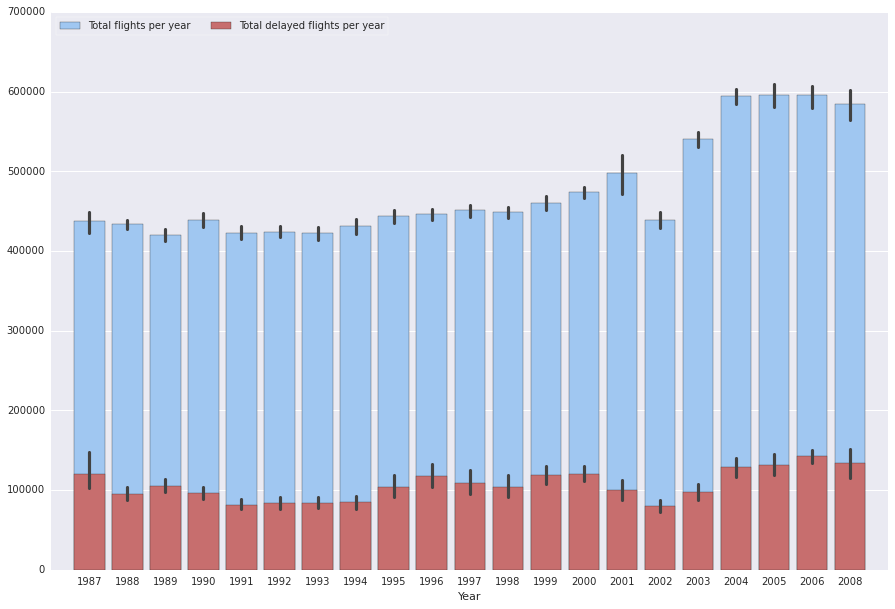

In [38]:
pdf_full_year_month = pd.DataFrame(data=full_year_month_count.collect())

sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(15, 10))

sns.set_color_codes("pastel")
sns.barplot(x=0, y=2, data=pdf_full_year_month,
            label="Total flights per year", color="b")

sns.set_color_codes("muted")
sns.barplot(x=0, y=3, data=pdf_full_year_month,
            label="Total delayed flights per year", color="r")

ax.legend(ncol=2, loc="upper left", frameon=True)
ax.set(xlim=(-1, 21), ylabel="",
       xlabel="Year")
sns.despine(right=True, top=True )

<div class="alert alert-success"> 
This graph sums up the trends of flights volumes and delays from 1987 and 2008. The volume started increasing around year 2000 and so does the delay volume. 
<br>
<br>
To have a better understanding we need a delay ratio that we report below.
</div>

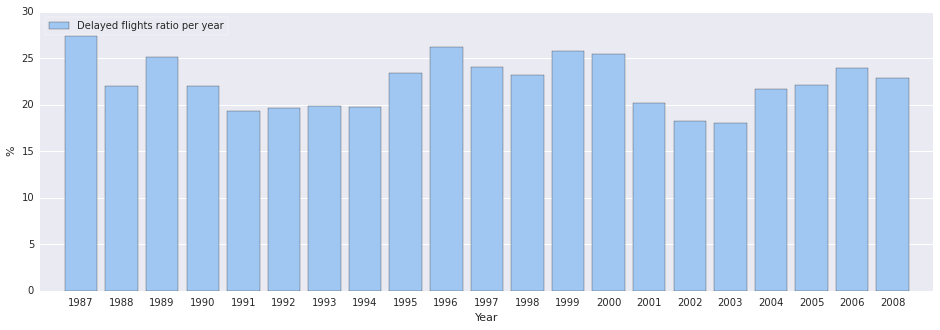

In [69]:
tmp = full_year_month_count.groupBy('year')\
    .agg(func.sum('total_flights').alias('total_flights'), func.sum('total_delayed').alias('total_delayed'))

tmp = tmp.withColumn('delay_perc', round(100*tmp.total_delayed / tmp.total_flights, 2))\
        .select('year', 'delay_perc').orderBy('year')

    
pdf_tmp = pd.DataFrame(data=tmp.collect())

sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(16, 5))
sns.set_color_codes("pastel")

sns.barplot(x=0, y=1, data=pdf_tmp,
            label="Delayed flights ratio per year", color="b")

ax.legend(ncol=2, loc="upper left", frameon=True)
ax.set(xlim=(-1, 21), ylabel="%",
       xlabel="Year")
sns.despine(right=True, top=True )

<div class="alert alert-success"> 
Despite an increasing flights volume, the delay percentage remains in a stable range: between 20% and 25%. This suggests us that there isn't a real correlation between trafic volume and delay and that (logistically) airports have become more flexible to handle more inbound and outbound flights without accumulating delays.
</div>

<div class="alert alert-success"> 
Instead of looking statistics per year, let's plot the changes over months.
</div>

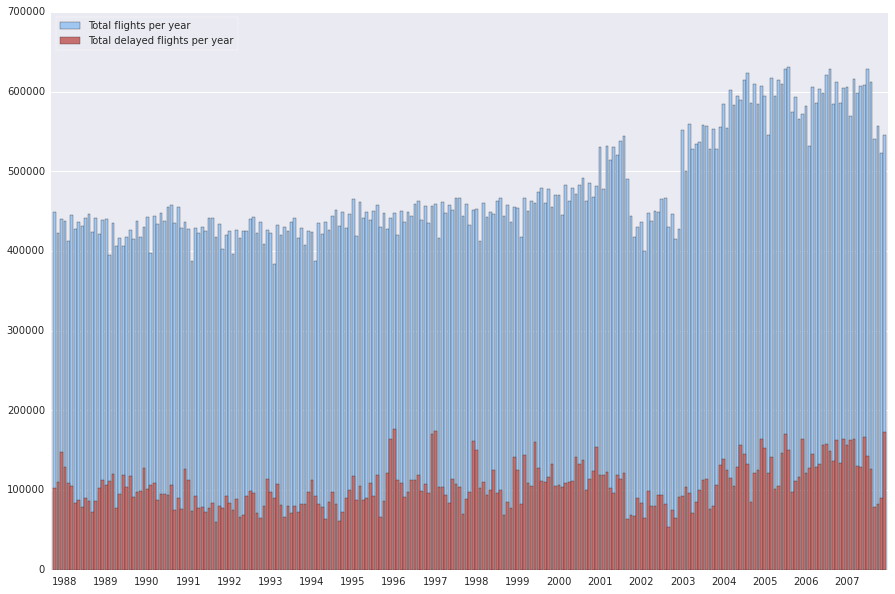

In [70]:
pdf_full_year_month = pd.DataFrame(data=\
                    full_year_month_count.withColumn('date', col=concat('year', lit(' '), 'month'))\
                                         .select('date', 'total_flights', 'total_delayed')\
                                         .collect())
years = ['','','']
for y in range(1988, 2008):
    years.append(y)
    for m in range(11):
        years.append(' ')
        
        
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(15, 10))

sns.set_color_codes("pastel")
sns.barplot(x=0, y=1, data=pdf_full_year_month,
            label="Total flights per year", color="b")

sns.set_color_codes("muted")
g = sns.barplot(x=0, y=2, data=pdf_full_year_month,
            label="Total delayed flights per year", color="r")

ax.legend(ncol=1, loc="upper left", frameon=True)

ax.set(xlim=(-1, 243), ylabel="",
       xlabel="", xticklabels=years)
sns.despine(right=True, top=True )

<div class="alert alert-success"> 
Let's dig on what happened after 2001 and the terroristic attaks to the WTC in New York.
</div>

In [71]:
millen = full_year_month_count.filter(full_year_month_count.year.isin([2000, 2001, 2002]))\
        .withColumn('date', col=concat(full_year_month_count.year, lit(' '), full_year_month_count.month))\
        .select('date', 'total_flights', 'total_delayed').cache()

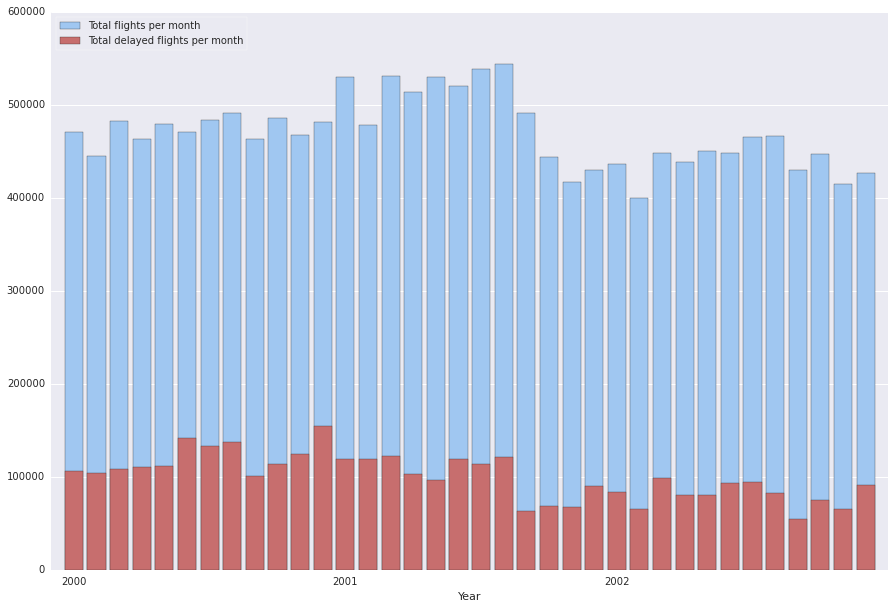

In [72]:
pdf_millen = pd.DataFrame(data=millen.collect())

sns.set(style="darkgrid")

f, ax = plt.subplots(figsize=(15, 10))

years = []
for y in range(2000, 2003):
    years.append(y)
    for m in range(11):
        years.append(' ')

sns.set_color_codes("pastel")
sns.barplot(x=0, y=1, data=pdf_millen,
            label="Total flights per month", color="b")

sns.set_color_codes("muted")
sns.barplot(x=0, y=2, data=pdf_millen,
            label="Total delayed flights per month", color="r")

ax.legend(ncol=1, loc="upper left", frameon=True)
ax.set(xlim=(-1, 36), ylabel="",
       xlabel="Year", xticklabels=years)
sns.despine(right=True, top=True )

<div class="alert alert-success"> 
After September 2001, we see a drop in the traffic volume, justified by the fear of terrorism.
</div>

<div class="alert alert-success"> 
<h3>Most used models in the 2000's</h3>
<br>
We report some analytics on aircraftf models and manufacturers
</div>

In [73]:
flights_with_planes_df = cleaned_df.filter(cleaned_df.year.isin([i for i in range(2000, 2009)]))\
                                   .join(planes_df, cleaned_df.tail_number == planes_df.tailnum,\
                                         how='left_outer')\
                                   .drop(planes_df.tailnum).drop(planes_df.year).cache()

In [74]:
most_used_model_df = flights_with_planes_df.filter(flights_with_planes_df.model.isNotNull())\
                                           .groupBy('model', 'manufacturer').count()\
                                           .orderBy('count', ascending = False).cache()
most_used_model_df.show()

+--------------+--------------------+-------+
|         model|        manufacturer|  count|
+--------------+--------------------+-------+
|   CL-600-2B19|      BOMBARDIER INC|2674635|
|     EMB-145LR|             EMBRAER|1640724|
|DC-9-82(MD-82)|   MCDONNELL DOUGLAS|1292067|
|         MD-88|MCDONNELL DOUGLAS...|1252550|
|      A320-232|    AIRBUS INDUSTRIE|1042059|
|       737-3H4|              BOEING|1000615|
|       717-200|              BOEING| 994043|
|       757-232|              BOEING| 934031|
|   CL-600-2C10|      BOMBARDIER INC| 857476|
|       737-7H4|              BOEING| 841337|
|     EMB-120ER|             EMBRAER| 752062|
|       757-222|              BOEING| 713020|
|       737-322|              BOEING| 663771|
|   CL-600-2B19|            CANADAIR| 633720|
|       737-524|              BOEING| 542850|
|       737-824|              BOEING| 529889|
|       737-832|              BOEING| 505541|
|     EMB-145XR|             EMBRAER| 475891|
|      A320-232|              AIRB

In [75]:
most_used_manuf_df = flights_with_planes_df.filter(flights_with_planes_df.manufacturer.isNotNull())\
                                           .groupBy( 'manufacturer').count()\
                                           .orderBy('count', ascending = False).cache()
most_used_manuf_df.show()

+--------------------+--------+
|        manufacturer|   count|
+--------------------+--------+
|              BOEING|11838280|
|             EMBRAER| 4112641|
|      BOMBARDIER INC| 3728807|
|    AIRBUS INDUSTRIE| 3165042|
|   MCDONNELL DOUGLAS| 2365060|
|MCDONNELL DOUGLAS...| 1269635|
|              AIRBUS|  996403|
|            CANADAIR|  633720|
|             DOUGLAS|  361292|
|MCDONNELL DOUGLAS...|  175297|
|              CESSNA|   86021|
|         DEHAVILLAND|   82717|
|         SAAB-SCANIA|   75999|
|        AEROSPATIALE|   68170|
| AEROSPATIALE/ALENIA|   65865|
|               PIPER|   38112|
|               RAVEN|   26347|
|               BEECH|   25729|
|      FRIEDEMANN JON|    9391|
|                BELL|    9277|
+--------------------+--------+
only showing top 20 rows



<div class="alert alert-success"> 
This time we studied the actual number of flights per manufacturer over a 20-year time span.
We obtain similar results as above: Boeing is the leader and Airbus is in second place.
</div>

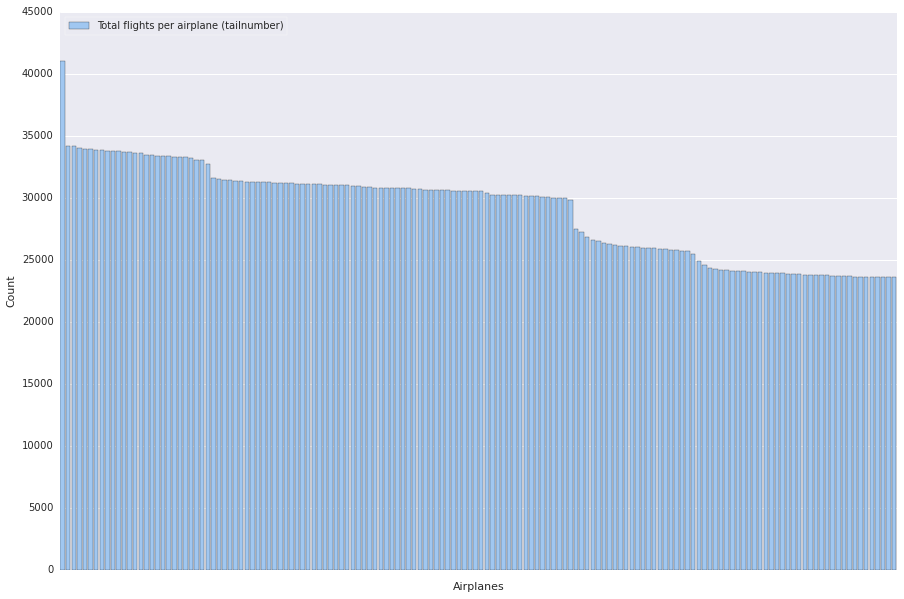

In [76]:
flights_per_plane = cleaned_df.filter(cleaned_df.tail_number.isNotNull())\
                              .filter(~cleaned_df.tail_number.isin(['UNKNOW', 0, '000000', '�NKNO�']))\
                              .groupBy('tail_number').count().orderBy('count', ascending=0).cache()

pdf_flights_per_plane = pd.DataFrame(data=flights_per_plane.limit(150).collect())
#pdf_full_year_month = pdf_full_year_month.rename(columns={0: 'year', '1': 'newName2'})

#print(pdf_full_year_month)

sns.set(style="darkgrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

sns.set_color_codes("pastel")
sns.barplot(x=0, y=1, data=pdf_flights_per_plane,
            label="Total flights per airplane (tailnumber)", color="b")

ax.legend(ncol=2, loc="upper left", frameon=True)
ax.set(ylabel="Count",
       xlabel="Airplanes", xticklabels=[])
sns.despine(right=True, top=True )

<div class="alert alert-success"> 
This plot represents the total number of flights per aircraft over 20 years. It's interesting to notice that the variance of the usage of aircraft is very small. This may be due to two factors: 
<ul>
<li>    law regulations </li>
<li>    minimization of aircraft inactive time </li>
</ul>
What we show here is that a single aircraft travels around 4/5 times a day. 
</div>

<div class="alert alert-success"> 
<h3> Which are the busiest routes? </h3>
</div>

In [31]:
airport_data_schema = StructType([ \
    #StructField( name, dataType, nullable)
    StructField("iata",        StringType(), True), \
    StructField("airport",           StringType(), True), \
    StructField("city",   StringType(), True), \
    StructField("state",     StringType(), True), \
    StructField("country",          StringType(), True), \
    StructField("lat",         FloatType(), True), \
    StructField("long",  FloatType(), True), \
])

airports_path = "additional_data/airports.csv"
raw_airports = sc.textFile(airports_path)
header = raw_airports.first()
airports_column = raw_airports.filter(lambda l: l != header)\
    .map(lambda l: l.split(","))\
    .filter(lambda x: len(x) == 7)\
    .map(lambda cols: 
         (
            cols[0][1:-1]  if cols[0] else None,
            cols[1][1:-1]  if cols[1] else None,
            cols[2][1:-1]  if cols[2] else None,
            cols[3][1:-1]  if cols[3] else None,
            cols[4][1:-1]  if cols[4] else None,
            float(cols[5])  if cols[5] else None,
            float(cols[6])  if cols[6] else None,
         ))
    
airports_df = sqlContext.createDataFrame(airports_column, airport_data_schema).cache()

airports_df.show()


+----+--------------------+------------------+-----+-------+---------+----------+
|iata|             airport|              city|state|country|      lat|      long|
+----+--------------------+------------------+-----+-------+---------+----------+
| 00M|            Thigpen |       Bay Springs|   MS|    USA|31.953764|-89.234505|
| 00R|Livingston Municipal|        Livingston|   TX|    USA|30.685862| -95.01793|
| 00V|         Meadow Lake|  Colorado Springs|   CO|    USA|38.945747|-104.56989|
| 01G|        Perry-Warsaw|             Perry|   NY|    USA| 42.74135| -78.05208|
| 01J|    Hilliard Airpark|          Hilliard|   FL|    USA|30.688013|-81.905945|
| 01M|   Tishomingo County|           Belmont|   MS|    USA|34.491665| -88.20111|
| 02A|         Gragg-Wade |           Clanton|   AL|    USA|32.850487| -86.61145|
| 02C|             Capitol|        Brookfield|   WI|    USA| 43.08751| -88.17787|
| 02G|   Columbiana County|    East Liverpool|   OH|    USA|40.673313|  -80.6414|
| 03D|    Memphi

In [39]:
busy_routes = cleaned_df.groupBy('src_airport', 'dest_airport').count()\
                        .join(airports_df, airports_df.iata == cleaned_df.src_airport)\
                        .select('src_airport', 'city', 'airport', 'dest_airport', 'count')\
                        .withColumnRenamed('city', 'src_city')\
                        .withColumnRenamed('airport', 'src_name')\
                        .join(airports_df, airports_df.iata == cleaned_df.dest_airport)\
                        .select('src_airport', 'src_city', 'src_name', 'dest_airport', 'airport', 'city', 'count')\
                        .withColumnRenamed('city', 'dest_city')\
                        .withColumnRenamed('airport', 'dest_name').orderBy(desc('count')).cache()
                        
busy_routes.show()

+-----------+-------------+--------------------+------------+--------------------+-----------------+------+
|src_airport|     src_city|            src_name|dest_airport|           dest_name|        dest_city| count|
+-----------+-------------+--------------------+------------+--------------------+-----------------+------+
|        SFO|San Francisco|San Francisco Int...|         LAX|Los Angeles Inter...|      Los Angeles|326513|
|        LAX|  Los Angeles|Los Angeles Inter...|         SFO|San Francisco Int...|    San Francisco|325146|
|        LAX|  Los Angeles|Los Angeles Inter...|         LAS|McCarran Internat...|        Las Vegas|277740|
|        LAS|    Las Vegas|McCarran Internat...|         LAX|Los Angeles Inter...|      Los Angeles|272513|
|        LAX|  Los Angeles|Los Angeles Inter...|         PHX|Phoenix Sky Harbo...|          Phoenix|267922|
|        PHX|      Phoenix|Phoenix Sky Harbo...|         LAX|Los Angeles Inter...|      Los Angeles|267851|
|        ORD|      Chicago|C

<div class="alert alert-success"> 
We need now to join entries where source and destination airports are swapped, but the same.
</div>

In [40]:
unique_busy_routes = busy_routes.withColumn('A', when(busy_routes.src_airport > busy_routes.dest_airport, \
                                            busy_routes.src_airport).otherwise(busy_routes.dest_airport))\
                                .withColumn('B', when(busy_routes.src_airport < busy_routes.dest_airport, \
                                            busy_routes.src_airport).otherwise(busy_routes.dest_airport))\
                                .groupBy('A', 'B').agg(func.sum('count').alias('count')).orderBy(desc('count'))
unique_busy_routes = unique_busy_routes.join(airports_df, airports_df.iata == unique_busy_routes.A)\
                          .select('A', 'city', 'airport', 'B', 'count')\
                          .withColumnRenamed('city', 'src_city')\
                          .withColumnRenamed('airport', 'src_name')\
                         .join(airports_df, airports_df.iata == unique_busy_routes.B)\
                        .select('A', 'src_city', 'src_name', 'B', 'city', 'airport','count')\
                        .withColumnRenamed('city', 'dest_city')\
                        .withColumnRenamed('airport', 'dest_name').orderBy(desc('count')).cache()
                                
unique_busy_routes.show()

+---+-----------------+--------------------+---+-----------------+--------------------+------+
|  A|         src_city|            src_name|  B|        dest_city|           dest_name| count|
+---+-----------------+--------------------+---+-----------------+--------------------+------+
|SFO|    San Francisco|San Francisco Int...|LAX|      Los Angeles|Los Angeles Inter...|651659|
|LAX|      Los Angeles|Los Angeles Inter...|LAS|        Las Vegas|McCarran Internat...|550253|
|PHX|          Phoenix|Phoenix Sky Harbo...|LAX|      Los Angeles|Los Angeles Inter...|535773|
|ORD|          Chicago|Chicago O'Hare In...|MSP|      Minneapolis|Minneapolis-St Pa...|479149|
|PHX|          Phoenix|Phoenix Sky Harbo...|LAS|        Las Vegas|McCarran Internat...|455811|
|ORD|          Chicago|Chicago O'Hare In...|LGA|         New York|           LaGuardia|442518|
|HOU|          Houston|     William P Hobby|DAL|           Dallas|        Dallas Love |428277|
|ORD|          Chicago|Chicago O'Hare In...|EWR|  

<div class="alert alert-success"> 
Los Angeles - San Francisco is the busiest route while the second busiest is Los Angeles - Las Vegas. Los Angeles appears also in third position with a link with Phoenix.
</div>

<div class="alert alert-success"> 

<h1> Weather feature </h1>
<br>
We think weather information may be a valuable addition to our predictions. To retreive this feature, we used the suggested online history service (Weather Underground). Using a simple Python script (not included in this notebook), we performed a series of calls to the API; due to limited amount of queries, we downloaded weather information only for 1994 and only for the top 25 airports, knowing that this will cover a reasonable amount of traffic.
</div>

In [58]:
# to start testing, we can focus on a single year
input_path_weather = "additional_data/weather2.csv"
raw_weather_data = sc.textFile(input_path_weather)

cleaned_weather_columns_full = raw_weather_data.map(lambda l: l.split(","))\
    .filter(lambda x: len(x) >= 5)\
    .map(lambda cols: 
         (
            cols[0]  if cols[0] else None,
            int(cols[1])  if cols[1] else None,
            int(cols[2])  if cols[2] else None,
            int(cols[3])  if cols[3] else None,
            cols[4] if cols[4] else None,
            cols[5] if cols[5] else None, 
            cols[6]  if cols[6] else None,
            cols[7]  if cols[7] else None,
            cols[8]  if cols[8] else None,
            cols[9]   if cols[9] else None,
            cols[10]  if cols[10] else None,
            cols[11]  if len(cols) >11 else 'unknown',
            cols[12]  if len(cols) >12 else 'unknown',
            cols[13]  if len(cols) >13 else 'unknown',
            cols[14]  if len(cols) >14 else 'unknown',
            cols[15]  if len(cols) >15 else 'unknown',
            cols[16]  if len(cols) >16 else 'unknown',
            cols[17]  if len(cols) >17 else 'unknown',
            cols[18]  if len(cols) >18 else 'unknown',
            cols[19]  if len(cols) >19 else 'unknown',
            cols[20]  if len(cols) >20 else 'unknown',
            cols[21]   if len(cols) >21 else 'unknown',
            cols[22]   if len(cols) >22 else 'unknown',
            cols[23]   if len(cols) >23 else 'unknown',
            cols[24]   if len(cols) >24 else 'unknown',
            cols[25]  if len(cols) >25 else 'unknown',
            cols[26]  if len(cols) >26 else 'unknown',
            cols[27]   if len(cols) >27 else 'unknown',
         ))
    
weather_data_schema = StructType([ \
    #StructField( name, dataType, nullable)
    StructField("airport", StringType(), True), \
    StructField("year",    IntegerType(), True), \
    StructField("month",   IntegerType(), True), \
    StructField("day",     IntegerType(), True), \
    StructField("0",      StringType(), True), \
    StructField("1",      StringType(), True), \
    StructField("2",      StringType(), True), \
    StructField("3",      StringType(), True), \
    StructField("4",      StringType(),  True), \
    StructField("5",      StringType(), True), \
    StructField("6",      StringType(), True), \
    StructField("7",      StringType(), True), \
    StructField("8",      StringType(), True), \
    StructField("9",      StringType(),  True), \
    StructField("10",      StringType(), True), \
    StructField("11",      StringType(), True), \
    StructField("12",      StringType(), True), \
    StructField("13",      StringType(), True), \
    StructField("14",      StringType(),  True),\
    StructField("15",      StringType(), True), \
    StructField("16",      StringType(), True), \
    StructField("17",      StringType(), True), \
    StructField("18",      StringType(), True), \
    StructField("19",      StringType(),  True), \
    StructField("20",      StringType(), True), \
    StructField("21",      StringType(), True), \
    StructField("22",      StringType(), True), \
    StructField("23",      StringType(), True) \
])

weather_df = sqlContext.createDataFrame(cleaned_weather_columns_full, weather_data_schema).cache()


weather_df.filter(weather_df.airport=='SFO').filter(weather_df.day==2).filter(weather_df.month==1)\
          .select('airport', '2').show()


+-------+------+
|airport|     2|
+-------+------+
|    SFO|cloudy|
+-------+------+



<div class="alert alert-success">
For each airport and for each day of the year, the API could provide a lot of data (wind strength, wind direction, rain, snow [cm]) but we just select only hourly descriptive information about the general weather conditions.
</div>
<br>
<div class="alert alert-success">
Now, the next big step is to include the right hour feature in our base dataframe. This is done in two steps, one for the source airport and one for the destination airport. Note that airports for which we don't know the weather are still present in the dataframe with conditions ``unknown``
</div>

In [59]:
weather_flights_df = df_complete.withColumn('departure_slot', floor((df_complete['departure_time']%2400)/100))\
                                .join(weather_df, (df_complete.year==weather_df.year) & \
                                                  (df_complete.month==weather_df.month) &\
                                                  (df_complete.day_of_month==weather_df.day) &\
                                                  (df_complete.src_airport==weather_df.airport), how='left_outer')\
                                .cache()

def get_weather(x):
    if x[29] == None:
         return 'unknown'
    if x[34+x[29]] == None:
        return 'unknown'
    return  x[34+x[29]]
src_weather_rdd = weather_flights_df.rdd.map(lambda x: [x[0:29], get_weather(x)])\
                                        .map(lambda x: (x[0] + (str(x[1]),) ) ) 

weather_src_data_schema = StructType([ \
    #StructField( name, dataType, nullable)
    StructField("year",                     IntegerType(), True), \
    StructField("month",                    IntegerType(), True), \
    StructField("day_of_month",             IntegerType(), True), \
    StructField("day_of_week",              IntegerType(), True), \
    StructField("departure_time",           IntegerType(), True), \
    StructField("scheduled_departure_time", IntegerType(), True), \
    StructField("arrival_time",             IntegerType(), True), \
    StructField("scheduled_arrival_time",   IntegerType(), True), \
    StructField("carrier",                  StringType(),  True), \
    StructField("flight_number",            StringType(),  True), \
    StructField("tail_number",              StringType(),  True), \
    StructField("actual_elapsed_time",      IntegerType(), True), \
    StructField("scheduled_elapsed_time",   IntegerType(), True), \
    StructField("air_time",                 IntegerType(), True), \
    StructField("arrival_delay",            IntegerType(), True), \
    StructField("departure_delay",          IntegerType(), True), \
    StructField("src_airport",              StringType(),  True), \
    StructField("dest_airport",             StringType(),  True), \
    StructField("distance",                 IntegerType(), True), \
    StructField("taxi_in_time",             IntegerType(), True), \
    StructField("taxi_out_time",            IntegerType(), True), \
    StructField("cancelled",                StringType(),  True), \
    StructField("cancellation_code",        StringType(),  True), \
    StructField("diverted",                 StringType(),  True), \
    StructField("carrier_delay",            IntegerType(), True), \
    StructField("weather_delay",            IntegerType(), True), \
    StructField("nas_delay",                IntegerType(), True), \
    StructField("security_delay",           IntegerType(), True), \
    StructField("late_aircraft_delay",      IntegerType(), True),\
    StructField("src_weather",              StringType(), True)\
])
weather_src_flights_df = sqlContext.createDataFrame(src_weather_rdd, weather_src_data_schema)
weather_src_flights_df.select('src_airport', 'src_weather', 'departure_time', 'arrival_time').show(2)

+-----------+------------+--------------+------------+
|src_airport| src_weather|departure_time|arrival_time|
+-----------+------------+--------------+------------+
|        CLT|      cloudy|           858|         954|
|        CLT|partlycloudy|           859|         952|
+-----------+------------+--------------+------------+
only showing top 2 rows



In [60]:
weather_flights_df = weather_src_flights_df\
                        .withColumn('arrival_slot', floor((weather_src_flights_df['arrival_time']%2400)/100))\
                        .join(weather_df, (weather_src_flights_df.year==weather_df.year) & \
                                          (weather_src_flights_df.month==weather_df.month) &\
                                          (weather_src_flights_df.day_of_month==weather_df.day) &\
                                          (weather_src_flights_df.dest_airport==weather_df.airport), how='left_outer')\
                        .cache()
def get_weather2(x):
    if x[30] is None:
        return 'unknown'
    if x[35+x[30]] == None:
        return 'unknown'
    return  x[35+x[30]]
dest_src_weather_rdd = weather_flights_df.rdd.map(lambda x: [x[0:30], get_weather2(x)])\
                                             .map(lambda x: (x[0] + (str(x[1]),) ) ) 

weather_dest_src_data_schema = StructType([ \
    #StructField( name, dataType, nullable)
    StructField("year",                     IntegerType(), True), \
    StructField("month",                    IntegerType(), True), \
    StructField("day_of_month",             IntegerType(), True), \
    StructField("day_of_week",              IntegerType(), True), \
    StructField("departure_time",           IntegerType(), True), \
    StructField("scheduled_departure_time", IntegerType(), True), \
    StructField("arrival_time",             IntegerType(), True), \
    StructField("scheduled_arrival_time",   IntegerType(), True), \
    StructField("carrier",                  StringType(),  True), \
    StructField("flight_number",            StringType(),  True), \
    StructField("tail_number",              StringType(),  True), \
    StructField("actual_elapsed_time",      IntegerType(), True), \
    StructField("scheduled_elapsed_time",   IntegerType(), True), \
    StructField("air_time",                 IntegerType(), True), \
    StructField("arrival_delay",            IntegerType(), True), \
    StructField("departure_delay",          IntegerType(), True), \
    StructField("src_airport",              StringType(),  True), \
    StructField("dest_airport",             StringType(),  True), \
    StructField("distance",                 IntegerType(), True), \
    StructField("taxi_in_time",             IntegerType(), True), \
    StructField("taxi_out_time",            IntegerType(), True), \
    StructField("cancelled",                StringType(),  True), \
    StructField("cancellation_code",        StringType(),  True), \
    StructField("diverted",                 StringType(),  True), \
    StructField("carrier_delay",            IntegerType(), True), \
    StructField("weather_delay",            IntegerType(), True), \
    StructField("nas_delay",                IntegerType(), True), \
    StructField("security_delay",           IntegerType(), True), \
    StructField("late_aircraft_delay",      IntegerType(), True),\
    StructField("src_weather",              StringType(), True), \
    StructField("dest_weather",              StringType(), True)\
])

weather_flights_full_df = sqlContext.createDataFrame(dest_src_weather_rdd, weather_dest_src_data_schema)
weather_flights_full_df.select('src_airport', 'src_weather', 'departure_time',\
                               'dest_airport', 'dest_weather', 'arrival_time').show(20)

+-----------+------------+--------------+------------+------------+------------+
|src_airport| src_weather|departure_time|dest_airport|dest_weather|arrival_time|
+-----------+------------+--------------+------------+------------+------------+
|        CLT|      cloudy|           858|         ORF|     unknown|         954|
|        CLT|partlycloudy|           859|         ORF|     unknown|         952|
|        CLT|partlycloudy|           935|         ORF|     unknown|        1023|
|        CLT|       sleet|           903|         ORF|     unknown|        1131|
|        CLT|        rain|           933|         ORF|     unknown|        1024|
|        CLT|     unknown|          null|         ORF|     unknown|        null|
|        CLT|      cloudy|           903|         ORF|     unknown|        1005|
|        CLT|       clear|           859|         ORF|     unknown|        1004|
|        CLT|      cloudy|           859|         ORF|     unknown|         955|
|        CLT|       clear|  

In [61]:
weather_df.groupBy('20').count().show()

+------------+-----+
|          20|count|
+------------+-----+
|         fog|  448|
|     unknown| 1108|
|        rain| 1186|
|mostlycloudy| 1995|
|        hazy|    3|
|       clear| 1863|
|      cloudy| 1666|
|partlycloudy| 1867|
|       sleet|   33|
|     tstorms|  271|
|        snow|  145|
+------------+-----+



# 4. Building a model of our data
Now that we have a good grasp on our data and its features, we will focus on how build a statistic model. Note that the features we can decide to use, to train our model, can be put in two groups:

- **Explicit features**: these are features that are present in the original data, or that can be built using additional data sources such as `weather` (for example querying a public API)
- **Implicit features**: these are the features that are inferred from other features such as `is_weekend`, `is_holiday`, `season`, `in_winter`,...

In this notebook, we will focus on the following predictors: `year`, `month`, `day_of_month`, `day_of_week`, `scheduled_departure_time`, `scheduled_arrival_time`, `carrier`, `is_weekend`, `distance`, `src_airport`, `dest_airport`. Among them, `is_weekend` is an implicit feature. The rest are explicit features.

The target feature is `arrival_delay`. 

Currently, MLLIB only supports building models from RDDs. It is important to read well the documentation and the MLLib API, to make sure to use the algorithms in an appropriate manner:

- MLLIB supports both categorical and numerical features. However, for each categorical feature, we have to indicate how many distinct values they can take
- Each training record must be a ```LabelledPoint```. This data structure has 2 components: ```label``` and ```predictor vector```. ```label``` is the value of target feature in the current record. ```predictor vector``` is a vector of values of type ```Double```. As such, we need to map each value of each categorical feature to a number. In this project, we choose a naïve approach: map each value to a unique index. 
- MLLIB uses a binning technique to find the split point (the predicate in each tree node). In particular, it divides the domain of numerical features into ```maxBins``` bins (32 by default). With categorical features, each distinct value fits in its own bin. **IMPORTANT:** MLLIB requires that no categorical feature have more than `maxBins` distinct values.
- We fill up the missing values in each **categorical** feature with its most common value. The missing values of a **numerical** feature are also replaced by the most common value (however, in some cases, a more sensible approach would be to use the median of this kind of feature).


## 4.1 Mapping values of each categorical feature to indices

### Question 6 

Among the selected features, `src_aiport`, `dest_airport`, `carrier` and `distance` have missing values. Besides, the first three of them are categorical features. That means, in order to use them as input features of MLLIB, the values of these features must be numerical. We can use a naïve approach: map each value of each feature to a unique index.

#### Question 6.1
<div class="alert alert-info">
Calculate the frequency of each source airport in the data and build a dictionary that maps each of them to a unique index.  

**Note:** we sort the airports by their frequency in descending order, so that we can easily take the most common airport(s) by taking the first element(s) in the result.
</div>

In [62]:
# select distinct source airports and map values to index
# sort the airport by their frequency descending
# so the most common aiport will be on the top
stat_src = (
    df
        .groupBy('src_airport')
        .agg(func.count('*').alias('count'))
        .orderBy(desc('count'))
    )
stat_src.show(5)
# extract the airport names from stat_src
src_airports = [item[0] for item in stat_src.collect()]
pprint(src_airports[0:5])

num_src_airports = len(src_airports)
src_airports_idx = range(0, num_src_airports)
map_src_airport_to_index = dict(zip(src_airports, src_airports_idx))

#pprint(map_src_airport_to_index)
# # test the dictionary
print(map_src_airport_to_index['ORD'])
print(map_src_airport_to_index['ATL'])

+-----------+------+
|src_airport| count|
+-----------+------+
|        ORD|277741|
|        DFW|256274|
|        ATL|221486|
|        LAX|153494|
|        STL|151609|
+-----------+------+
only showing top 5 rows

['ORD', 'DFW', 'ATL', 'LAX', 'STL']
0
2


#### Question 6.2
<div class="alert alert-info">
Calculate the frequency of each destination airport in the data and build a dictionary that maps each of them to a unique index.
</div>

In [63]:
# select distinct source airports and map values to index
# sort the airport by their frequency descending
# so the most common aiport will be on the top
stat_dest = (
    df
        .groupBy('dest_airport')
        .agg(func.count('*').alias('count'))
        .orderBy(desc('count'))
    )
stat_dest.show(5)
# extract the airport names from stat_src
dest_airports = [item[0] for item in stat_dest.collect()]
pprint(dest_airports[0:5])

num_dest_airports = len(dest_airports)
dest_airports_idx = range(0, num_dest_airports)
map_dest_airport_to_index = dict(zip(dest_airports, dest_airports_idx))

# # test the dictionary
print(map_dest_airport_to_index['ORD'])
print(map_dest_airport_to_index['ATL'])

+------------+------+
|dest_airport| count|
+------------+------+
|         ORD|283720|
|         DFW|260249|
|         ATL|221588|
|         LAX|152959|
|         STL|152800|
+------------+------+
only showing top 5 rows

['ORD', 'DFW', 'ATL', 'LAX', 'STL']
0
2


#### Question 6.3
<div class="alert alert-info">
Calculate the frequency of each carrier in the data and build a dictionary that maps each of them to a unique index.
</div>

In [64]:
stat_carrier = (
    df
        .groupBy('carrier')
        .agg(func.count('*').alias('count'))
        .orderBy(desc('count'))
    )
stat_carrier.show(5)
# extract the airport names from stat_src
carriers = [item[0] for item in stat_carrier.collect()]
pprint(carriers[0:5])

num_carriers = len(carriers)
carriers_idx = range(0, num_carriers)
map_carriers_to_index = dict(zip(carriers, carriers_idx))

# # test the dictionary
print(map_carriers_to_index['US'])
print(map_carriers_to_index['DL'])

+-------+------+
|carrier| count|
+-------+------+
|     DL|874526|
|     US|857906|
|     AA|722277|
|     UA|638750|
|     WN|565426|
+-------+------+
only showing top 5 rows

['DL', 'US', 'AA', 'UA', 'WN']
1
0


## 4.2 Calculating the most common value of each feature
We use a simple strategy for filling in the missing values: replacing them with the most common value of the corresponding feature.

<div class="alert alert-danger">
**IMPORTANT NOTE:** features like ```month```, ```day_of_month```, etc... can be treated as numerical features in general. However, when it comes to build the model, it is much easier considering them as categorical features. In this case, to compute the most common value for such categorical features, we simply use the frequency of occurrence of each `label`, and chose the most frequent.
</div>

### Question 7
In the previous question, when constructing the dictionary for categorical features, we also sort their statistical information in a such way that the most common value of each feature are placed on the top.

Note that, feature `is_weekend` has the most common value set to `0` (that is, `no` the day is not a weekend).

#### Question 7.1
<div class="alert alert-info">
Find the most common value of feature `month` in data.
</div>



In [65]:
most_common_month = (
    df
        .groupBy('month')
        .agg(func.count('*').alias('count'))
        .orderBy(desc('count'))
    ).first()[0]

print("The most common month:", most_common_month)

The most common month: 8


#### Question 7.2
<div class="alert alert-info">
Find the most common value of features `day_of_month` and `day_of_week`.
</div>

In [66]:
most_common_day_of_month = (
    df
        .groupBy('day_of_month')
        .agg(func.count('*').alias('count'))
        .orderBy(desc('count'))
    ).first()[0]

most_common_day_of_week = (
    df
        .groupBy('day_of_week')
        .agg(func.count('*').alias('count'))
        .orderBy(desc('count'))
    ).first()[0]

print("The most common day of month:", most_common_day_of_month)
print("The most common day of week:", most_common_day_of_week)


The most common day of month: 11
The most common day of week: 3


#### Question 7.3
<div class="alert alert-info">
Find the most common value of features `scheduled_departure_time` and `scheduled_arrival_time`.
</div>

In [67]:
most_common_s_departure_time = (
    df
        .groupBy('scheduled_departure_time')
        .agg(func.count('*').alias('count'))
        .orderBy(desc('count'))
    ).first()[0]

most_common_s_arrival_time = (
    df
        .groupBy('scheduled_arrival_time')
        .agg(func.count('*').alias('count'))
        .orderBy(desc('count'))
    ).first()[0]

print("The most common scheduled departure time:", most_common_s_departure_time)
print("The most common scheduled arrival time:", most_common_s_arrival_time)

The most common scheduled departure time: 700
The most common scheduled arrival time: 1915


#### Question 7.4
<div class="alert alert-info">
Calculate the mean of distance in the data. This value will be used to fill in the missing values of feature `distance` later.
</div>

In [68]:
# calculate mean distance
mean_distance = (
    df
        .agg((func.sum('distance')/func.count('*')).alias('count'))
        .orderBy(desc('count'))
    ).first()[0]
print("mean distance:", mean_distance)

mean distance: 667.7687320658033


#### Question 7.5
<div class="alert alert-info">
Calculate the mean of arrival delay.
</div>

In [69]:
# calculate mean arrival delay
mean_arrival_delay = (
    df
        .agg((func.sum('arrival_delay')/func.count('*')).alias('count'))
        .orderBy(desc('count'))
    ).first()[0]
print("mean arrival delay:", mean_arrival_delay)


mean arrival delay: 5.576300451269949


As known from section 3.4, there are 225 different origin airports and 225 different destination airports, more than the number of bins in default configuration. So, we must set `maxBins` >= 225.

## 4.3 Preparing training data and testing data
Recall, in this project we focus on decision trees. One way to think about our task is that we want to predict the unknown `arrival_delay` as a function combining several features, that is:

`arrival_delay = f(year, month, day_of_month, day_of_week, scheduled_departure_time, scheduled_arrival_time, carrier, src_airport, dest_airport, distance, is_weekend)`

When categorical features contain corrupt data (e.g., missing values), we proceed by replacing corrupt information with the most common value for the feature. For numerical features, in general, we use the same approach as for categorical features; in some cases, we repair corrupt data using the mean value of the distribution for numerical features (e.g., we found the mean for `delay` and `distance`, by answering questions above).

The original data is split randomly into two parts with ratios 70% for **training** and 30% for **testing**.

### Question 8
<div class="alert alert-info">
  o  Replace the missing values of each feature in our data by the corresponding most common value or mean.  

  o  Divide data into two parts: 70% for **training** and 30% for **testing**

</div>

In [70]:
def is_valid(value):
    return value != "NA" and len(value) > 0

data = cleaned_1994RDD\
    .map(lambda line: line.split(','))\
    .map(lambda values: 
        LabeledPoint( 
            int(values[14]) if is_valid(values[14]) else mean_arrival_delay, # arrival delay
            [
    int(values[0]), # year
    int(values[1]) if is_valid(values[1]) else most_common_month, # month
    int(values[2]) if is_valid(values[2]) else most_common_day_of_month, # day of month
    int(values[3]) if is_valid(values[3]) else most_common_day_of_week, # day of week
    int(values[5]) if is_valid(values[5]) else most_common_s_departure_time, # scheduled departure time
    int(values[7]) if is_valid(values[7]) else most_common_s_arrival_time, # scheduled arrival time
    # if the value is valid, map it to the corresponding index
    # otherwise, use the most common value
    map_carriers_to_index[values[8]] if is_valid(values[8]) else map_carriers_to_index[carriers[0]], # carrier
    map_src_airport_to_index[values[16]] if is_valid(values[16]) else map_src_airport_to_index[carriers[0]],
    map_dest_airport_to_index[values[17]] if is_valid(values[17]) else map_dest_airport_to_index[carriers[0]], 
    float(values[18]) if is_valid(values[18]) else mean_distance, # distance
    1 if is_valid(values[3]) and int(values[3]) >= 6 else 0, # is_weekend
            ]
        )
    )

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit([0.7, 0.3])

trainingData = trainingData.cache()
testData = testData.cache()


## 5.4 Building a decision tree model

### Question 9
<div class="alert alert-info">
We can train a decision model by using function
<code>
`DecisionTree.trainRegressor(<training_data>, categoricalFeaturesInfo=<categorical_info>, impurity=<impurity_function>,  maxDepth=<max_depth>, maxBins=<max_bins>)`.  
</code>  

Where,  
<ul>

<li> `training_data`: the data used for training  </li>

<li> `categorical_info`: a dictionary that maps the index of each categorical features to its number of distinct values  </li>

<li> `impurity_function`: the function that is used to calculate impurity of data in order to select the best split  </li>

<li> `max_depth`: the maximum depth of the tree  </li>

<li> `max_bins`: the maximum number of bins that the algorithm will divide on each feature. </li>

</ul>  

Note that, `max_bins` cannot be smaller than the number distinct values of every categorical features.  

Complete the code below to train a decision tree model.
</div>


In [1]:
# declare information of categorical features
# format:  feature_index : number_distinct_values
categorical_info = {6 : num_carriers, 7: num_src_airports, 8: num_dest_airports, 10: 2}

# Train a DecisionTree model.
t0 = time()
model = DecisionTree.trainRegressor(trainingData, 
                                    categoricalFeaturesInfo=categorical_info,
                                    impurity='variance', maxDepth=12, maxBins=255)
t1 = time()
# print('Training done in ', t1-t0)

## 5.5 Testing the decision tree model

### Question 10
#### Question 10.1
<div class="alert alert-info">
We often use Mean Square Error as a metric to evaluate the quality of a tree model.  

Complete the code below to calculate the MSE of our trained model.
</div>

In [62]:
# Evaluate model on test instances and compute test error
predictions = model.predict(testData.map(lambda x: x.features))
labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)

testMSE = labelsAndPredictions.map(lambda p: (p[0]-p[1])**2).reduce(lambda x,y:x+y)/labelsAndPredictions.count()
print('Test Mean Squared Error = ' + str(testMSE))


Test Mean Squared Error = 492.67683928247664


### Question 10.2
<div class="alert alert-info">
Comment the results you have obtained. Is the MSE value you get from a decision tree indicating that our statistical model is very good in predicting airplane delays?  

Use your own words to describe and interpret the value you obtained for the MSE.
</div>

<div class="alert alert-warning">
In statistical models, MSE can be identifyed as variance estimation of a probabilistic distribution. This often used in regression (like our case) as the loss function to be minimized and it represents an empiric estimation of the prediction-error variance for the model under analysis.
<br><br>
The Root Mean Squared Error (RMSE), on the other hand, gives us an indication of confidence interval of our predictions. For instance, with the model just trained, if we suppose that the probabilistic distribution of the ``arrival delay`` is Gaussian, we can say that on avarage with probability ~0.7 the real ``arrival delay`` is in the range $predicted \pm 23 min$.
</div>

## 5.6 Building random decision forest model (or random forest)
Next, we use MLLib to build a more powerful model: random forests. In what follows, use the same predictors defined and computed above to build a decision tree, but this time use them to build a random decision forest.

### Question 11
<div class="alert alert-info">
Train a random decision forest model and evaluate its quality using MSE metric.  

Compare to decision tree model and comment the results.  

Similarly to question 10.2, comment with your own words the MSE value you have obtained.
</div>

In [71]:
# Train a RandomForest model.
forest_model = RandomForest.trainRegressor(trainingData, categoricalFeaturesInfo=categorical_info,
                                    numTrees=10, impurity='variance', maxDepth=14, maxBins=1023)

In [72]:
predictions = forest_model.predict(testData.map(lambda x: x.features))
labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)

testMSE = labelsAndPredictions.map(lambda p: (p[0]-p[1])**2).mean()
print('Test Mean Squared Error = ' + str(testMSE))

Test Mean Squared Error = 465.383641637595


<div class="alert alert-warning"> 
It's interesting to compare the result we got from Random Forests with the one with Decision Trees.
<br>
As expected, the MSE on the test set is decreased and this is due to the different approach of these two models. In fact, one problem that might occur with one big (deep) single Decision Trees is that it can easly overfit on the training data and there isn't a straighfoward way to prevent it. On the other hard, this is the biggest advantage of Random Forests as they tend to prevent overfitting by random resampling. 
<br>
This allows single tree in a forest to go deeper and deeper without suffering overfitting as long as the number of trees is also increased.
<br><br>
This suggests us to explore a little bit more the hyper-parameter space of these models. 
</div>

## 5.7 Parameter tuning
In this lecture, we used `maxDepth=12`, `maxBins=255`, `numTrees=10`. Next, we are going to explore the meta-parameter space a little bit.

For more information about parameter tuning, please read the documentation of [MLLIB](http://spark.apache.org/docs/latest/mllib-decision-tree.html#tunable-parameters)

### Question 12
<div class="alert alert-info">
Train the random forest model using different parameters, to understand their impact on the main performance metric we have used here, that is the MSE. For example, you can try a similar approach to that presented in the Notebook on recommender systems, that is using nested for loops.
</div>

<div class="alert alert-danger">
**NOTE:** be careful when selecting parameters as some might imply very long training times, or eventually, the typical memory problems that affect Spark!
</div>

<div class="alert alert-success">
Firstly, we start with a brute-force exploration of the parameters for decision trees, just to understand how different choises affect the overall performance.
</div>

In [109]:
depths = range(5, 16, 1)
bins = [2**8-1, 2**9-1, 2**10-1]

In [112]:
evaluations = []
categorical_info = {6 : num_carriers, 7: num_src_airports, 8: num_dest_airports, 10: 2}

(trainingData, testData) = data.randomSplit([0.7, 0.3])
trainingData = trainingData.cache()
testData = testData.cache()

for d in depths:
    for b in bins:
        print('Training with d=%d and b=%d' % (d, b), end=' ')
        t0 = time()
        model = DecisionTree.trainRegressor(trainingData, 
                                            categoricalFeaturesInfo=categorical_info,
                                            impurity='variance', maxDepth=d, maxBins=b)
        t1 = time()
        print('\tTraining: %.2f s' % (t1-t0), end=' ')
        t0 = time()
        predictions = model.predict(testData.map(lambda x: x.features))
        labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)

        testMSE = labelsAndPredictions.map(lambda p: (p[0]-p[1])**2).mean()
        t1 = time()
        print('\tPrediction: %.2f s' % (t1-t0))
        print('\tTest MSE = %.2f' % (testMSE))
        evaluations.append(((d ,b), testMSE))
    

Training with depth 5 and num. bins 255 	Training done in 74.15 	Prediction done in 35.32
	Test MSE = 527.31
Training with depth 5 and num. bins 511 	Training done in 4.80 	Prediction done in 4.20
	Test MSE = 527.51
Training with depth 5 and num. bins 1023 	Training done in 7.06 	Prediction done in 4.03
	Test MSE = 527.51
Training with depth 6 and num. bins 255 	Training done in 5.02 	Prediction done in 3.96
	Test MSE = 524.14
Training with depth 6 and num. bins 511 	Training done in 5.75 	Prediction done in 4.07
	Test MSE = 524.55
Training with depth 6 and num. bins 1023 	Training done in 7.48 	Prediction done in 3.91
	Test MSE = 524.55
Training with depth 7 and num. bins 255 	Training done in 5.49 	Prediction done in 3.93
	Test MSE = 520.48
Training with depth 7 and num. bins 511 	Training done in 6.24 	Prediction done in 4.09
	Test MSE = 521.06
Training with depth 7 and num. bins 1023 	Training done in 7.59 	Prediction done in 4.02
	Test MSE = 521.08
Training with depth 8 and num. b

In [117]:
evaluations.sort(key=lambda x:x[1], reverse=False)
pprint(evaluations[0:10])

[((13, 255), 485.14542356095325),
 ((13, 1023), 486.33458227017456),
 ((14, 255), 486.51572822985605),
 ((14, 1023), 487.9407134635314),
 ((12, 255), 488.41771586265855),
 ((13, 511), 488.52690648572417),
 ((14, 511), 490.0576002603326),
 ((12, 1023), 490.6278919178593),
 ((12, 511), 490.7637582722592),
 ((15, 255), 494.4639847195247)]


<div class="alert alert-success">
We can see what we mentioned earlier about overfitting. In fact, it's quite clear that increasing the depth the tree overfits on training set and performs worst on the test set. The number of bins in which a numerical feature can be split seems not to affect dramatically the overall performance, even though the lowest number of bins (255) performs always better.
</div>


<div class="alert alert-success">
Let's now to the same for Random Forests
</div>

In [122]:
depths = range(5, 15, 2)
trees = range(10, 15, 2)
bins = [2**8-1, 2**9-1, 2**10-1]

In [123]:
evaluations = []
categorical_info = {6 : num_carriers, 7: num_src_airports, 8: num_dest_airports, 10: 2}

(trainingData, testData) = data.randomSplit([0.7, 0.3])
trainingData = trainingData.cache()
testData = testData.cache()

for d in depths:
    for b in bins:
        for t in trees:
            print('Training with depth %d, bins %d and trees %d' % (d, b, t), end=' ')
            t0 = time()
            model =  RandomForest.trainRegressor(trainingData, 
                                                 categoricalFeaturesInfo=categorical_info,
                                                 featureSubsetStrategy='auto',
                                                 impurity='variance', maxDepth=d, maxBins=b, numTrees=t)
            t1 = time()
            print('\tTraining done in %.2f' % (t1-t0), end=' ')
            t0 = time()
            predictions = model.predict(testData.map(lambda x: x.features))
            labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)

            testMSE = labelsAndPredictions.map(lambda p: (p[0]-p[1])**2).mean()
            t1 = time()
            print('\tPrediction done in %.2f' % (t1-t0))
            print('\tTest MSE = %.2f' % (testMSE))
            evaluations.append(((d, b, t), testMSE))

Training with depth 5, bins 255 and trees 10 	Training done in 83.75 	Prediction done in 35.30
	Test MSE = 520.32
Training with depth 5, bins 255 and trees 12 	Training done in 18.25 	Prediction done in 6.28
	Test MSE = 520.23
Training with depth 5, bins 255 and trees 14 	Training done in 21.92 	Prediction done in 6.92
	Test MSE = 519.72
Training with depth 5, bins 511 and trees 10 	Training done in 16.79 	Prediction done in 5.44
	Test MSE = 520.14
Training with depth 5, bins 511 and trees 12 	Training done in 19.11 	Prediction done in 6.16
	Test MSE = 519.88
Training with depth 5, bins 511 and trees 14 	Training done in 23.32 	Prediction done in 7.29
	Test MSE = 519.89
Training with depth 5, bins 1023 and trees 10 	Training done in 18.95 	Prediction done in 4.97
	Test MSE = 521.30
Training with depth 5, bins 1023 and trees 12 	Training done in 20.13 	Prediction done in 6.45
	Test MSE = 519.85
Training with depth 5, bins 1023 and trees 14 	Training done in 23.66 	Prediction done in 7.0

In [124]:
evaluations.sort(key=lambda x:x[1], reverse=False)
pprint(evaluations[0:10])

[((13, 1023, 14), 465.45060669483433),
 ((13, 255, 12), 467.4439897250339),
 ((13, 511, 10), 467.70703124626675),
 ((13, 1023, 10), 467.8458865451707),
 ((13, 511, 14), 468.3666340293603),
 ((13, 511, 12), 468.812352844149),
 ((13, 255, 14), 469.0388174204183),
 ((13, 1023, 12), 470.47530554634045),
 ((13, 255, 10), 470.6473266616856),
 ((11, 255, 12), 485.2931060207558)]


<div class="alert alert-success">
Here we can see the real power of random forests. Even though the perfomance is not too far away from the one with decision trees, we can still find some interesting trends. For instance, the best combination is the one with higher depth and higher number of trees. This suggests to hazard a little bit more with this two parameters. 
</div>

In [2]:
evaluations = []
depths = [12, 14, 16, 18]
trees = [14, 16, 18]

categorical_info = {6 : num_carriers, 7: num_src_airports, 8: num_dest_airports, 10: 2}
(trainingData, testData) = data.randomSplit([0.75, 0.25])
trainingData = trainingData.cache()
testData = testData.cache()

for d in depths:
    for t in trees:
#         print('Training with d=%d and t=%d' % (d, t), end=' ')
            
        t0 = time()
        model = RandomForest.trainRegressor(trainingData, 
                                           categoricalFeaturesInfo=categorical_info,
                                            impurity='variance', maxDepth=d, numTrees=t, maxBins=1023)
        t1 = time()
#         print('\t\tTrain: %.2f s' % (t1-t0), end=' ')

        t0 = time()
        predictions = model.predict(testData.map(lambda x: x.features))
        labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)
        testMSE = labelsAndPredictions.map(lambda p: (p[0]-p[1])**2).mean()
        t1 = time()
#         print('\t\tPred: %.2f s' % (t1-t0), end=' ')
#         print('\tMSE = %.2f' % (testMSE))
        evaluations.append(((d, t), testMSE))

<div class="alert alert-success">
This confirms our expectations: the biggest populated forest always perfoms better!
<br><br>
    <div class="alert alert-danger">
    Unfortunatelly, due to time issue in training and prediction, it was impossible for us to go even deeper. We are confident to say that increasing a little bit more these two parameters we could drop under 400.
    </div>
</div>

<div><br><br></div>


<div class="alert alert-success">
<h1>Cross Validation</h1>
<br>
It seems that performance can change a lot according to how the dataset is split between training and test data. To have a more realistic estimation of the model, we performed a <b>Monte Carlo Cross Validation</b> where, for each iteration, training and test set is randomly resampled from the dataset.
<br><br>
<div class="alert alert-danger">
    For the same aforementioned reason, we did cross validation only for decision trees.
    </div>
</div>

In [72]:
evaluations = []
depths = range(12, 20, 2)
bins = [2**8-1, 2**9-1, 2**10-1]

categorical_info = {6 : num_carriers, 7: num_src_airports, 8: num_dest_airports, 10: 2}

for d in depths:
    for b in bins:
        for i in range(3):
            print('Training with d=%d and b=%d' % (d, b), end=' ')
            (trainingData, testData) = data.randomSplit([0.75, 0.25])
            trainingData = trainingData.cache()
            testData = testData.cache()
            t0 = time()
            model = DecisionTree.trainRegressor(trainingData, 
                                            categoricalFeaturesInfo=categorical_info,
                                            impurity='variance', maxDepth=d, maxBins=b, minInfoGain=0.2)
            t1 = time()
            trainingData.unpersist()
            print('\t\tTrain: %.2f s' % (t1-t0), end=' ')
            t0 = time()
            predictions = model.predict(testData.map(lambda x: x.features))
            testData.unpersist()
            labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)
            testMSE = labelsAndPredictions.map(lambda p: (p[0]-p[1])**2).mean()
            t1 = time()
            print('\tPred: %.2f s' % (t1-t0), end=' ')
            print('\tMSE = %.2f' % (testMSE))
            evaluations.append(((d ,b), testMSE))
    

Training with d=12 and b=255 		Train: 71.38 s 	Pred: 31.14 s 	MSE = 490.84
Training with d=12 and b=255 		Train: 72.99 s 	Pred: 29.97 s 	MSE = 494.66
Training with d=12 and b=255 		Train: 70.07 s 	Pred: 31.28 s 	MSE = 495.43
Training with d=12 and b=511 		Train: 74.25 s 	Pred: 30.88 s 	MSE = 490.58
Training with d=12 and b=511 		Train: 73.47 s 	Pred: 31.21 s 	MSE = 491.29
Training with d=12 and b=511 		Train: 70.54 s 	Pred: 31.02 s 	MSE = 489.68
Training with d=12 and b=1023 		Train: 73.76 s 	Pred: 30.81 s 	MSE = 491.23
Training with d=12 and b=1023 		Train: 73.99 s 	Pred: 29.59 s 	MSE = 499.49
Training with d=12 and b=1023 		Train: 79.31 s 	Pred: 30.85 s 	MSE = 486.07
Training with d=14 and b=255 		Train: 80.05 s 	Pred: 30.69 s 	MSE = 487.19
Training with d=14 and b=255 		Train: 80.27 s 	Pred: 31.05 s 	MSE = 486.89
Training with d=14 and b=255 		Train: 78.44 s 	Pred: 31.38 s 	MSE = 487.90
Training with d=14 and b=511 		Train: 81.69 s 	Pred: 31.52 s 	MSE = 488.12
Training with d=14 and

In [91]:
evaluations.sort(key=lambda x:x[1], reverse=False)
cv = sqlContext.createDataFrame(evaluations, schema=['params', 'err'])
cv.write.format("json").save('cv_decisionTrees')
cv.groupBy(cv.params).agg(func.mean(cv.err), func.var_samp(cv.err)).orderBy('avg(err)').show()

+---------+------------------+-------------------+
|   params|          avg(err)|      var_samp(err)|
+---------+------------------+-------------------+
| [14,255]|  487.325704426652| 0.2648994618867918|
| [14,511]| 488.1339003679613|0.35682417753302675|
|[14,1023]|488.69873806686996|  6.220805043506384|
| [12,511]| 490.5154654166707| 0.6516777778333985|
|[12,1023]|   492.26349934275| 45.833373209839806|
| [12,255]| 493.6396346677944| 6.0443174174400225|
|[16,1023]|504.46784257254666|   9.58090187927134|
| [16,511]|504.50665051440177| 3.5903216442220427|
| [16,255]| 508.2944424813533|  8.344173431842783|
| [18,511]| 542.5992430010682| 24.178488085603046|
|[18,1023]|  546.547108061858| 15.802060389939198|
| [18,255]| 554.0648110992705| 16.672748285253498|
+---------+------------------+-------------------+



<div class="alert alert-success">
<h1>Feature Selection</h1>
<br>

Feature selection is a crucial choise to be done to reduce noise in the model and for save time during both training and prediction. A way to estimate how <i>good</i> a feature is to look at its correlation with the target variable (in our case, the ``arrival delay``) and a metrix to do so is the <b>Pearson's correlation coefficient</b>. This coefficient, also referred to as the <i>sample correlation coefficient</i>, it's a measure of linear dependency between two random variables.
<br><br>
So if we have two sets of samples of two random variables  $\lbrace x_1, \dots, x_n \rbrace$ and $\lbrace y_1, \dots, y_n \rbrace$, then that formula for the coefficient is:
<br><br>
$$r =\frac{\sum ^n _{i=1}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum ^n _{i=1}(x_i - \bar{x})^2} \sqrt{\sum ^n _{i=1}(y_i - \bar{y})^2}}$$
<br><br>
According to this definition, two linearly dependent variables are fully correlated and thus $r = \pm 1$, while if uncorrelated, the coefficient will tend to be 0. 
</div>

In [65]:
def computeCorrelation(DF, x, y):
    print('Computing correlation coefficient between', x ,'and', y)
    x_bar = DF.agg(func.mean(x)).collect()[0][0]
    y_bar = DF.agg(func.mean(y)).collect()[0][0]

    r_num = DF.agg(func.sum((DF[x]-x_bar)*(DF[y]-y_bar))).collect()[0][0]
    r_den =  math.sqrt(DF.agg(func.sum((DF[x]-x_bar)**2)).collect()[0][0])*\
             math.sqrt(DF.agg(func.sum((DF[y]-y_bar)**2)).collect()[0][0]) 
    return (r_num/r_den)

In [66]:
features = ['month', 'day_of_month', 'day_of_week', 'scheduled_departure_time',\
            'scheduled_arrival_time', 'distance', 'arrival_time']

In [67]:
correlations=[]
for f in features:
    correlations.append(computeCorrelation(df, f, 'arrival_delay'))

Computing correlation coefficient between month and arrival_delay
Computing correlation coefficient between day_of_month and arrival_delay
Computing correlation coefficient between day_of_week and arrival_delay
Computing correlation coefficient between scheduled_departure_time and arrival_delay
Computing correlation coefficient between scheduled_arrival_time and arrival_delay
Computing correlation coefficient between distance and arrival_delay
Computing correlation coefficient between arrival_time and arrival_delay


In [68]:
pprint(correlations)

[-0.04659842773456789,
 0.021827306533866674,
 -0.01596187315901436,
 0.11341938328782951,
 0.11308863616278812,
 0.011264464167376087,
 0.09500332241270654]


<div class="alert alert-success">
The results here are quite interesting. It seems that some features are not so good: for instance distance is not a useful information for predicting the arrival delay. This is might be justified by the fact that commonly a flight accumulates delay in proximity of an airport during takeoff/landing maneuvers due to high volume of inbound and outbound traffic.
<br><br>
On the other hand, as expected, the scheduled arrival time and the scheduled departure time are valuable information that the model should take into account.
<br><br><br><br>
Let's try now to train with less feature and let's see how it perfoms.
</div>

In [69]:
data = cleaned_1994RDD\
    .map(lambda line: line.split(','))\
    .map(lambda values: 
        LabeledPoint( 
            int(values[14]) if is_valid(values[14]) else mean_arrival_delay, # arrival delay
            [
    int(values[0]), # year
    int(values[1]) if is_valid(values[1]) else most_common_month, # month
    int(values[2]) if is_valid(values[2]) else most_common_day_of_month, # day of month
    int(values[5]) if is_valid(values[5]) else most_common_s_departure_time, # scheduled departure time
    int(values[7]) if is_valid(values[7]) else most_common_s_arrival_time, # scheduled arrival time
    map_carriers_to_index[values[8]] if is_valid(values[8]) else map_carriers_to_index[carriers[0]], # carrier
    map_src_airport_to_index[values[16]] if is_valid(values[16]) else map_src_airport_to_index[carriers[0]], 
    map_dest_airport_to_index[values[17]] if is_valid(values[17]) else map_dest_airport_to_index[carriers[0]]
            ]
        )
    )

categorical_info = {5 : num_carriers, 6: num_src_airports, 7: num_dest_airports}
    
# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit([0.7, 0.3])

trainingData = trainingData.cache()
testData = testData.cache()

In [70]:
# Train a DecisionTree model.
t0 = time()
model = DecisionTree.trainRegressor(trainingData, 
                                    categoricalFeaturesInfo=categorical_info,
                                    impurity='variance', maxDepth=12, maxBins=255)
t1 = time()
print('Training done in ', t1-t0)

t0 = time()
predictions = model.predict(testData.map(lambda x: x.features))
labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)

testMSE = labelsAndPredictions.map(lambda p: (p[0]-p[1])**2).mean()
t1 = time()
print('Prediction done in ', t1-t0)

print('Test Mean Squared Error = ' + str(testMSE))

Training done in  66.26195120811462
Prediction done in  0.09578752517700195
Test Mean Squared Error = 499.4632810477848


In [71]:
t0 = time()
forest_model = RandomForest.trainRegressor(trainingData, categoricalFeaturesInfo=categorical_info,
                                    numTrees=10, impurity='variance', maxDepth=12, maxBins=255)
t1 = time()
print('Training done in ', t1-t0)

t0 = time()
predictions = forest_model.predict(testData.map(lambda x: x.features))
labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)
t1 = time()
print('Prediction done in ', t1-t0)

testMSE = labelsAndPredictions.map(lambda p: (p[0]-p[1])**2).reduce(lambda x,y:x+y)/labelsAndPredictions.count()
print('Test Mean Squared Error = ' + str(testMSE))

Training done in  60.0690712928772
Prediction done in  0.4853174686431885
Test Mean Squared Error = 501.1410236112115


<div class="alert alert-success">
As expected, errors increased but at the same time, also both the training and prediction time dropped.
</div>

# 6. Addition (bonus) questions
As you may have noticed, the performance of our statistical models is somehow questionable! What are we missing here? Why is that even using state-of-the-art approaches give poor results?

In what follows, we will try to address some of the limitations of the present Notebook, and provide additional data that might help.

## 6.1. Additional data
In the HDFS file system you have used for running the Notebook, you will notice that there are several other years available (in addition to 1994), which could be used to train a statistical model with more data. In the end, we're playing with "Big Data", hence one might think that feeding more training data to the algorithm should help!

## 6.2. Feature selection

You might think that the flight delays do not only depend on the source airport, destination airport, departure time, etc... as we assumed. They also depend on other features such as the weather, the origin country, the destination city,... To improve the prediction quality, we should consider these features too.

There are some other datasets that related to this use case:

- Airport IATA Codes to City names and Coordinates mapping: http://stat-computing.org/dataexpo/2009/airports.csv
- Carrier codes to Full name mapping: http://stat-computing.org/dataexpo/2009/carriers.csv
- Information about individual planes: http://stat-computing.org/dataexpo/2009/plane-data.csv
- Weather information: http://www.wunderground.com/weather/api/. You can subscribe for free to the developers' API and obtain (at a limited rate) historical weather information in many different formats. Also, to get an idea of the kind of information is available, you can use this link: http://www.wunderground.com/history/


### Question 13
<div class="alert alert-info">
Using the data sources above, select additional feature and repeat the process of defining an appropriate training and test datasets, to evaluate the impact of new features on the performance of the model. Focus first on decision trees, then move to random forests.
</div>

<div class="alert alert-success">
<h1> Model with weather feature </h1>
<br><br>
Now, we recall the dataframe already prepared with the weather data and we perform training of both decision trees and random forest with this additional feature.  
Due to the limited amount of weather data we were able to download, we trained our model only on a subset of samples. This allowed us to compare the performance of this new model with the original. 
</div>

In [ ]:
data_df = weather_flights_full_df.where((col('src_weather') != 'unknown') | \
                                        (col('dest_weather') != 'unknown')).cache()
    
mean_arrival_delay = data_df.agg((func.sum('arrival_delay')/func.count('*')).alias('count'))\
                            .orderBy(desc('count')).first()[0]

most_common_month = data_df.groupBy('month').agg(func.count('*').alias('count'))\
                           .orderBy(desc('count')).first()[0]

most_common_day_of_month = data_df.groupBy('day_of_month').agg(func.count('*').alias('count'))\
                           .orderBy(desc('count')).first()[0]

most_common_day_of_week = data_df.groupBy('day_of_week').agg(func.count('*').alias('count'))\
                           .orderBy(desc('count')).first()[0]

most_common_s_departure_time = data_df.groupBy('scheduled_departure_time').agg(func.count('*').alias('count'))\
                           .orderBy(desc('count')).first()[0]

most_common_s_arrival_time = data_df.groupBy('scheduled_arrival_time').agg(func.count('*').alias('count'))\
                           .orderBy(desc('count')).first()[0]
    
stat_carrier = data_df.groupBy('carrier').agg(func.count('*').alias('count')).orderBy(desc('count'))
carriers = [item[0] for item in stat_carrier.collect()]
num_carriers = len(carriers)
carriers_idx = range(0, num_carriers)
map_carriers_to_index = dict(zip(carriers, carriers_idx))    

stat_dest = data_df.groupBy('dest_airport').agg(func.count('*').alias('count')).orderBy(desc('count'))
dest_airports = [item[0] for item in stat_dest.collect()]
num_dest_airports = len(dest_airports)
dest_airports_idx = range(0, num_dest_airports)
map_dest_airport_to_index = dict(zip(dest_airports, dest_airports_idx))
    
stat_src = data_df.groupBy('src_airport').agg(func.count('*').alias('count')).orderBy(desc('count'))
src_airports = [item[0] for item in stat_src.collect()]
num_src_airports = len(src_airports)
src_airports_idx = range(0, num_src_airports)
map_src_airport_to_index = dict(zip(src_airports, src_airports_idx))

stat_src_weather = data_df.groupBy('src_weather').agg(func.count('*').alias('count')).orderBy(desc('count'))
src_weather = [item[0] for item in stat_src_weather.collect()]
num_src_weather = len(src_weather)
src_weather_idx = range(0, num_src_weather)
map_src_weather_to_index = dict(zip(src_weather, src_weather_idx))

stat_dest_weather = data_df.groupBy('dest_weather').agg(func.count('*').alias('count')).orderBy(desc('count'))
dest_weather = [item[0] for item in stat_dest_weather.collect()]
num_dest_weather = len(dest_weather)
dest_weather_idx = range(0, num_dest_weather)
map_dest_weather_to_index = dict(zip(dest_weather, dest_weather_idx))


In [85]:
def is_valid(value):
    return value != None

data = data_df.rdd\
    .map(lambda values: 
        LabeledPoint( 
            int(values[14]) if is_valid(values[14]) else mean_arrival_delay, # arrival delay
            [
    int(values[1]) if is_valid(values[1]) else most_common_month, # month
    int(values[2]) if is_valid(values[2]) else most_common_day_of_month, # day of month
    int(values[3]) if is_valid(values[3]) else most_common_day_of_week, # day of week
    int(values[5]) if is_valid(values[5]) else most_common_s_departure_time, # scheduled departure time
    int(values[7]) if is_valid(values[7]) else most_common_s_arrival_time, # scheduled arrival time
    # if the value is valid, map it to the corresponding index
    # otherwise, use the most common value
    map_carriers_to_index[values[8]] if is_valid(values[8]) else map_carriers_to_index[carriers[0]], # carrier
    map_src_airport_to_index[values[16]] if is_valid(values[16]) else map_src_airport_to_index[carriers[0]], 
    map_dest_airport_to_index[values[17]] if is_valid(values[17]) else map_dest_airport_to_index[carriers[0]], 
    1 if is_valid(values[3]) and int(values[3]) >= 6 else 0, # is_weekend
    map_src_weather_to_index[values[-2]],
    map_dest_weather_to_index[values[-1]],
            ]
        )
    )
    
categorical_info = {5 : num_carriers, 6: num_src_airports, 7: num_dest_airports, \
                    8: 2, 9:num_src_weather, 10:num_dest_weather}

In [111]:
(trainingData, testData) = data.randomSplit([0.7, 0.3])
trainingData = trainingData.cache()
testData = testData.cache()

d = 15
b = 255
print('Training with d=%d and b=%d' % (d, b), end=' ')
t0 = time()
model = DecisionTree.trainRegressor(trainingData, 
                                         categoricalFeaturesInfo=categorical_info,
                                            impurity='variance', maxDepth=d, maxBins=b)
t1 = time()
print('\tTraining: %.2f s' % (t1-t0), end=' ')
t0 = time()
predictions = model.predict(testData.map(lambda x: x.features))
labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)

testMSE = labelsAndPredictions.map(lambda p: (p[0]-p[1])**2).mean()
t1 = time()
print('\tPrediction: %.2f s' % (t1-t0), end=' ')
print('\tMSE = %.2f' % (testMSE))

Training with d=15 and b=255 	Training: 96.56 s 	Prediction: 41.85 s 	MSE = 497.35


In [112]:
(trainingData, testData) = data.randomSplit([0.7, 0.3])
trainingData = trainingData.cache()
testData = testData.cache()

d = 18
t = 14
print('Training with d=%d and t=%d' % (d, t), end=' ')
            
t0 = time()
model = RandomForest.trainRegressor(trainingData, 
                                           categoricalFeaturesInfo=categorical_info,
                                            impurity='variance', maxDepth=d, numTrees=t, maxBins=1023)
t1 = time()
print('\t\tTrain: %.2f s' % (t1-t0), end=' ')

t0 = time()
predictions = model.predict(testData.map(lambda x: x.features))
labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)
testMSE = labelsAndPredictions.map(lambda p: (p[0]-p[1])**2).mean()
t1 = time()
print('\t\tPred: %.2f s' % (t1-t0), end=' ')
print('\tMSE = %.2f' % (testMSE))


Training with d=18 and t=14 		Train: 779.71 s 		Pred: 299.85 s 	MSE = 409.83


In [113]:
(trainingData, testData) = data.randomSplit([0.7, 0.3])
trainingData = trainingData.cache()
testData = testData.cache()

d = 19
t = 15
print('Training with d=%d and t=%d' % (d, t), end=' ')
            
t0 = time()
model = RandomForest.trainRegressor(trainingData, 
                                           categoricalFeaturesInfo=categorical_info,
                                            impurity='variance', maxDepth=d, numTrees=t, maxBins=1023)
t1 = time()
print('\t\tTrain: %.2f s' % (t1-t0), end=' ')

t0 = time()
predictions = model.predict(testData.map(lambda x: x.features))
labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)
testMSE = labelsAndPredictions.map(lambda p: (p[0]-p[1])**2).mean()
t1 = time()
print('\t\tPred: %.2f s' % (t1-t0), end=' ')
print('\tMSE = %.2f' % (testMSE))


Training with d=19 and t=15 		Train: 1784.23 s 		Pred: 380.94 s 	MSE = 395.78


# GradientBoostedTrees

In [3]:
categorical_info = {5 : num_carriers, 6: num_src_airports, \
                    7: num_dest_airports, 8: 2, 9:num_src_weather, 10:num_dest_weather}

(trainingData, testData) = data.randomSplit([0.7, 0.3])
trainingData = trainingData.cache()
testData = testData.cache()

In [4]:
t0 = time()
model = GradientBoostedTrees.trainRegressor(trainingData, 
                                            categoricalFeaturesInfo=categorical_info,
                                            loss='leastAbsoluteError', numIterations=15, \
                                            maxDepth=19, maxBins=1023, learningRate=0.2)
t1 = time()
# print('\tTraining done in %.2f' % (t1-t0), end=' ')

t0 = time()
predictions = model.predict(testData.map(lambda x: x.features))
labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)

testMSE = labelsAndPredictions.map(lambda p: (p[0]-p[1])**2).mean()
t1 = time()
# print('\tPrediction done in %.2f' % (t1-t0))
# print('\tTest MSE = %.2f' % (testMSE))


<div class="alert alert-success">
<h1> Future works </h1>
<br>
We think we can expand our data analysis and improve our predictions with the following ideas: 
<ul>
    <li>Training with other regression models (mostly Gaussian Processes)</li>
    <li>Training with more detailed information on weather</li>
    <li>Training with more years</li>
    <li>Investigate which route has the highest delay ratio or mean value</li>
    <li>Include data about flight cost and study its correlation with the delay or flight cancellation</li>
    <li>Prediction of cancelled flight probability (it might be worth warning users as soon as possible, whether the flight will have high probability to be cancelled)</li>
</ul>
</div>

# Summary
In this lecture, we've had an overview about Decision Trees, Random Forests and how to use them. We also insisted on a simple methodology to adopt when dealing with a Data Science problem. 
The main take home messages should be:

* Feature selection is a difficult, delicate and important task. In this project, the student was heavily guided. However, we invite to exercise with additional features, for example external ones related to weather conditions.

* Parameter tuning requires a deep understanding of the algorithm used to build a statistical model. In general, to reduce computational cost, several techniques introduce parameters that, if tuned properly, can lead to tremendous time savings.